In [28]:
import os

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# librosa is a Python library for analyzing audio and music.
# It can be used to extract the data from the audio files we will see it later
import librosa 
import librosa.display

# to play the audio files
from IPython.display import Audio
plt.style.use('seaborn-white')

In [29]:
DATA_FRAMES = True
fem_path = '/kaggle/working/Female_features.csv'
mal_path = '/kaggle/working/Male_features.csv'

In [30]:
# Paths for data.
TESS = "/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data"
RAV = "/kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24"
SAVEE = "/kaggle/input/surrey-audiovisual-expressed-emotion-savee/ALL"
CREMA = "/kaggle/input/cremad/AudioWAV"

In [31]:
# Get the data location for SAVEE
dir_list = os.listdir(SAVEE)

# parse the filename to get the emotions
emotion=[]
path = []

for i in dir_list:
    if i[-8:-6]=='_a':
        emotion.append('angry')
    elif i[-8:-6]=='_d':
        emotion.append('disgust')
    elif i[-8:-6]=='_f':
        emotion.append('fear')
    elif i[-8:-6]=='_h':
        emotion.append('happy')
    elif i[-8:-6]=='_n':
        emotion.append('neutral')
    elif i[-8:-6]=='sa':
        emotion.append('sad')
    elif i[-8:-6]=='su':
        emotion.append('surprise')
    else:
        emotion.append('unknown') 
    path.append(SAVEE + '/' + i)

# Now check out the label count distribution 
savee_list = ['SAVEE'] * len(emotion)
SAVEE_df = pd.DataFrame(emotion, columns = ['labels'])
SAVEE_df = pd.concat([SAVEE_df, pd.DataFrame(path, columns = ['path'])], axis = 1)
SAVEE_df['dataset'] = savee_list
print('SAVEE dataset', len(SAVEE_df))
SAVEE_df.head()

SAVEE dataset 480


,labels,path,dataset
0,happy,/kaggle/input/surrey-audiovisual-expressed-emo...,SAVEE
1,fear,/kaggle/input/surrey-audiovisual-expressed-emo...,SAVEE
2,happy,/kaggle/input/surrey-audiovisual-expressed-emo...,SAVEE
3,disgust,/kaggle/input/surrey-audiovisual-expressed-emo...,SAVEE
4,angry,/kaggle/input/surrey-audiovisual-expressed-emo...,SAVEE


In [32]:
# Get the data location for TESS
path = []
emotion = []
dir_list = os.listdir(TESS)
print(len(dir_list),dir_list)

for i in dir_list[1:15]:
    fname = os.listdir(TESS + '/' + i)   
    for f in fname:
        if i == 'OAF_angry' or i == 'YAF_angry':
            emotion.append('angry')
        elif i == 'OAF_disgust' or i == 'YAF_disgust':
            emotion.append('disgust')
        elif i == 'OAF_Fear' or i == 'YAF_fear':
            emotion.append('fear')
        elif i == 'OAF_happy' or i == 'YAF_happy':
            emotion.append('happy')
        elif i == 'OAF_neutral' or i == 'YAF_neutral':
            emotion.append('neutral')                                
        elif i == 'OAF_Pleasant_surprise' or i == 'YAF_pleasant_surprised':
            emotion.append('surprise')               
        elif i == 'OAF_Sad' or i == 'YAF_sad':
            emotion.append('sad')
        else:
            emotion.append('Unknown')
        path.append(TESS + '/' + i + "/" + f)

TESS_df = pd.DataFrame(emotion, columns = ['labels'])
#TESS_df['source'] = 'TESS'
TESS_df = pd.concat([TESS_df,pd.DataFrame(path, columns = ['path'])],axis=1)
TESS_list = ['TESS'] * len(emotion)
TESS_df['dataset'] = TESS_list

print('TESS dataset', len(TESS_df))
TESS_df.head()

14 ['YAF_fear', 'OAF_angry', 'OAF_Fear', 'OAF_disgust', 'OAF_neutral', 'YAF_angry', 'OAF_Sad', 'YAF_disgust', 'YAF_neutral', 'OAF_Pleasant_surprise', 'YAF_happy', 'OAF_happy', 'YAF_sad', 'YAF_pleasant_surprised']
TESS dataset 2600


,labels,path,dataset
0,angry,/kaggle/input/toronto-emotional-speech-set-tes...,TESS
1,angry,/kaggle/input/toronto-emotional-speech-set-tes...,TESS
2,angry,/kaggle/input/toronto-emotional-speech-set-tes...,TESS
3,angry,/kaggle/input/toronto-emotional-speech-set-tes...,TESS
4,angry,/kaggle/input/toronto-emotional-speech-set-tes...,TESS


In [33]:
# Importing datas from RAVDESS
dir = os.listdir(RAV)
print(dir)

males = []
females = [] 
        

for actor in dir:
       
    files = os.listdir(RAV + '/' +actor)
        
    for file in files: 
        part = file.split('.')[0]
        part = part.split("-")           
            
        temp = int(part[6])        
                
        if part[2] == '01':
            emotion = 'neutral'
        elif part[2] == '02':
            emotion = 'calm'
        elif part[2] == '03':
            emotion = 'happy'
        elif part[2] == '04':
            emotion = 'sad'
        elif part[2] == '05':
            emotion = 'angry'
        elif part[2] == '06':
            emotion = 'fear'
        elif part[2] == '07':
            emotion = 'disgust'
        elif part[2] == '08':
            emotion = 'surprise'
        else:
            emotion = 'unknown'
            
        if temp%2 == 0:
            path = (RAV + '/'+ actor + '/' + file)
            #emotion = 'female_'+emotion
            females.append([emotion, path]) 
        else:
            path = (RAV +'/'+ actor + '/' + file)
             #emotion = 'male_'+emotion
            males.append([emotion, path])   
    
   
RavFemales_df = pd.DataFrame(females)
RavFemales_df.columns = ['labels', 'path']
rav_list = ['RAVDESS'] * len(females)
RavFemales_df['dataset'] = rav_list



RavMales_df = pd.DataFrame(males)
RavMales_df.columns = ['labels', 'path']
rav_list = ['TESS'] * len(males)
RavMales_df['RAVDESS'] = rav_list

print('RAVDESS datasets')
RavFemales_df.head()

['Actor_02', 'Actor_17', 'Actor_05', 'Actor_16', 'Actor_21', 'Actor_01', 'Actor_11', 'Actor_20', 'Actor_08', 'Actor_15', 'Actor_06', 'Actor_12', 'Actor_23', 'Actor_24', 'Actor_22', 'Actor_04', 'Actor_19', 'Actor_10', 'Actor_09', 'Actor_14', 'Actor_03', 'Actor_13', 'Actor_18', 'Actor_07']
RAVDESS datasets


,labels,path,dataset
0,surprise,/kaggle/input/ravdess-emotional-speech-audio/a...,RAVDESS
1,neutral,/kaggle/input/ravdess-emotional-speech-audio/a...,RAVDESS
2,disgust,/kaggle/input/ravdess-emotional-speech-audio/a...,RAVDESS
3,disgust,/kaggle/input/ravdess-emotional-speech-audio/a...,RAVDESS
4,neutral,/kaggle/input/ravdess-emotional-speech-audio/a...,RAVDESS


In [34]:
files = os.listdir(CREMA)

female = [1002,1003,1004,1006,1007,1008,1009,1010,1012,1013,1018,1020,1021,1024,1025,1028,1029,1030,1037,1043,1046,1047,1049,
          1052,1053,1054,1055,1056,1058,1060,1061,1063,1072,1073,1074,1075,1076,1078,1079,1082,1084,1089,1091]
males = []
females = []

for file in files: 
    part = file.split('_')   
    
    if part[2] == 'SAD':
        emotion = 'sad'
    elif part[2] == 'ANG':
        emotion = 'angry'
    elif part[2] == 'DIS':
        emotion = 'disgust'
    elif part[2] == 'FEA':
        emotion = 'fear'
    elif part[2] == 'HAP':
        emotion = 'happy'
    elif part[2] == 'NEU':
        emotion = 'neutral'  
    else:
        emotion = 'unknown'
        
    if int(part[0]) in female:
        path = (CREMA + '/' + file)
        #emotion = 'female_'+emotion
        females.append([emotion, path]) 
    else:
        path = (CREMA + '/' + file)
        #emotion = 'male_'+emotion
        males.append([emotion, path])   

CremaFemales_df = pd.DataFrame(females)
CremaFemales_df.columns = ['labels', 'path']
crema_list = ['CREMA'] * len(females)
CremaFemales_df['dataset'] = crema_list

CremaMales_df = pd.DataFrame(males)
CremaMales_df.columns = ['labels', 'path']
crema_list = ['CREMA'] * len(males)
CremaMales_df['dataset'] = crema_list
    
print('CREMA datasets', len(CremaMales_df))
CremaMales_df.head()

CREMA datasets 3930


,labels,path,dataset
0,disgust,/kaggle/input/cremad/AudioWAV/1067_IWW_DIS_XX.wav,CREMA
1,disgust,/kaggle/input/cremad/AudioWAV/1066_TIE_DIS_XX.wav,CREMA
2,disgust,/kaggle/input/cremad/AudioWAV/1027_DFA_DIS_XX.wav,CREMA
3,happy,/kaggle/input/cremad/AudioWAV/1032_IEO_HAP_HI.wav,CREMA
4,sad,/kaggle/input/cremad/AudioWAV/1023_TIE_SAD_XX.wav,CREMA


In [35]:
# Now lets merge all the dataframe
Males = pd.concat([SAVEE_df, RavMales_df, CremaMales_df], axis = 0)
Males.to_csv("/kaggle/working/males_emotions_df.csv", index = False)

Females = pd.concat([TESS_df, RavFemales_df, CremaFemales_df], axis = 0)
Females.to_csv("/kaggle/working/females_emotions_df.csv", index = False)

In [36]:
df_m = pd.read_csv('/kaggle/working/males_emotions_df.csv')
df_f = pd.read_csv('/kaggle/working/females_emotions_df.csv')

In [37]:
males = []
females = []

for i in range(len(df_m)):
  males.append('m')
for i in range(len(df_f)):
  females.append('f')

In [38]:
df_f['Gender'] = females
df_m['Gender'] = males

In [39]:
final_df = pd.concat([df_f, df_m])
final_df = final_df.drop('RAVDESS', axis=1)
final_df

,labels,path,dataset,Gender
0,angry,/kaggle/input/toronto-emotional-speech-set-tes...,TESS,f
1,angry,/kaggle/input/toronto-emotional-speech-set-tes...,TESS,f
2,angry,/kaggle/input/toronto-emotional-speech-set-tes...,TESS,f
3,angry,/kaggle/input/toronto-emotional-speech-set-tes...,TESS,f
4,angry,/kaggle/input/toronto-emotional-speech-set-tes...,TESS,f
...,...,...,...,...
5125,happy,/kaggle/input/cremad/AudioWAV/1059_WSI_HAP_XX.wav,CREMA,m
5126,angry,/kaggle/input/cremad/AudioWAV/1033_WSI_ANG_XX.wav,CREMA,m
5127,angry,/kaggle/input/cremad/AudioWAV/1088_IWL_ANG_XX.wav,CREMA,m
5128,angry,/kaggle/input/cremad/AudioWAV/1050_IOM_ANG_XX.wav,CREMA,m


In [40]:
final_df.to_csv("/kaggle/working/final_df.csv", index = False)

# Training part

In [41]:
!pip install joblib

In [42]:
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import joblib


# to play the audio files
from IPython.display import Audio

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [43]:
df = pd.read_csv('/kaggle/working/final_df.csv')

In [44]:
df[:1000]

,labels,path,dataset,Gender
0,angry,/kaggle/input/toronto-emotional-speech-set-tes...,TESS,f
1,angry,/kaggle/input/toronto-emotional-speech-set-tes...,TESS,f
2,angry,/kaggle/input/toronto-emotional-speech-set-tes...,TESS,f
3,angry,/kaggle/input/toronto-emotional-speech-set-tes...,TESS,f
4,angry,/kaggle/input/toronto-emotional-speech-set-tes...,TESS,f
...,...,...,...,...
995,angry,/kaggle/input/toronto-emotional-speech-set-tes...,TESS,f
996,angry,/kaggle/input/toronto-emotional-speech-set-tes...,TESS,f
997,angry,/kaggle/input/toronto-emotional-speech-set-tes...,TESS,f
998,angry,/kaggle/input/toronto-emotional-speech-set-tes...,TESS,f


In [45]:
len(df)

11962

In [46]:
df

,labels,path,dataset,Gender
0,angry,/kaggle/input/toronto-emotional-speech-set-tes...,TESS,f
1,angry,/kaggle/input/toronto-emotional-speech-set-tes...,TESS,f
2,angry,/kaggle/input/toronto-emotional-speech-set-tes...,TESS,f
3,angry,/kaggle/input/toronto-emotional-speech-set-tes...,TESS,f
4,angry,/kaggle/input/toronto-emotional-speech-set-tes...,TESS,f
...,...,...,...,...
11957,happy,/kaggle/input/cremad/AudioWAV/1059_WSI_HAP_XX.wav,CREMA,m
11958,angry,/kaggle/input/cremad/AudioWAV/1033_WSI_ANG_XX.wav,CREMA,m
11959,angry,/kaggle/input/cremad/AudioWAV/1088_IWL_ANG_XX.wav,CREMA,m
11960,angry,/kaggle/input/cremad/AudioWAV/1050_IOM_ANG_XX.wav,CREMA,m


In [47]:
print(df['labels'].value_counts())

angry       1923
disgust     1923
sad         1923
happy       1923
fear        1723
neutral     1703
surprise     652
calm         192
Name: labels, dtype: int64


In [48]:
print(df['dataset'].value_counts())

CREMA      7442
TESS       2600
RAVDESS     720
SAVEE       480
Name: dataset, dtype: int64


In [49]:
df = df[df['path'].str.endswith('.wav')]

In [50]:
data_path = df[['labels', 'path']]

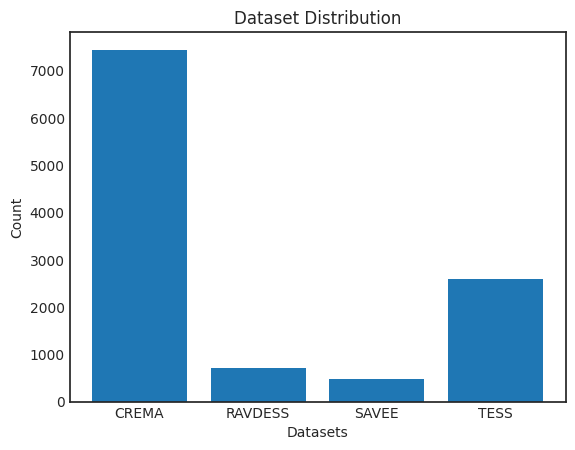

In [51]:
import matplotlib.pyplot as plt

# check if the labels column exists in the DataFrame
if 'dataset' in df.columns:
    # group the DataFrame by the labels column and count the number of occurrences
    emotions_count = df.groupby('dataset')['dataset'].count()
else:
    raise ValueError('labels column not found in DataFrame')

# create a bar chart
plt.bar(emotions_count.index, emotions_count.values)

# set the chart title and axis labels
plt.title('Dataset Distribution')
plt.xlabel('Datasets')
plt.ylabel('Count')

# display the chart
plt.show()


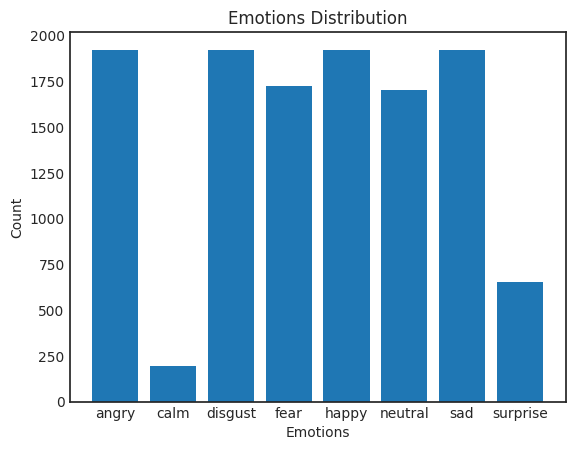

In [52]:
import matplotlib.pyplot as plt

# check if the labels column exists in the DataFrame
if 'labels' in df.columns:
    # group the DataFrame by the labels column and count the number of occurrences
    emotions_count = df.groupby('labels')['labels'].count()
else:
    raise ValueError('labels column not found in DataFrame')

# create a bar chart
plt.bar(emotions_count.index, emotions_count.values)

# set the chart title and axis labels
plt.title('Emotions Distribution')
plt.xlabel('Emotions')
plt.ylabel('Count')

# display the chart
plt.show()


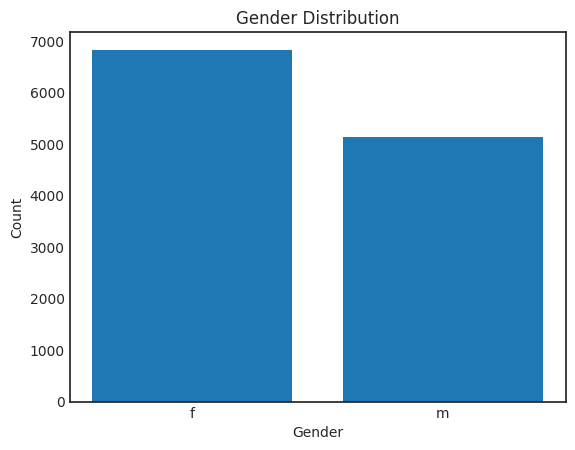

In [66]:
import matplotlib.pyplot as plt

# check if the labels column exists in the DataFrame
if 'Gender' in df.columns:
    # group the DataFrame by the labels column and count the number of occurrences
    emotions_count = df.groupby('Gender')['Gender'].count()
else:
    raise ValueError('labels column not found in DataFrame')

# create a bar chart
plt.bar(emotions_count.index, emotions_count.values)

# set the chart title and axis labels
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

# display the chart
plt.show()

# Intonation contour features

In [53]:
!pip install praat-parselmouth

In [55]:
import pandas as pd
import numpy as np
import parselmouth
from pydub import AudioSegment
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

def extract_features(audio_file):
    """
    Extracts pitch and prosodic features from an audio file.
    """
    # Load the audio file
    sound = AudioSegment.from_file(audio_file)
    # Convert to mono and resample to 44.1 kHz
    sound = sound.set_channels(1).set_frame_rate(44100)
    # Convert to numpy array
    signal = np.array(sound.get_array_of_samples())
    # Compute pitch features using Praat
    pitch = parselmouth.Sound(signal, sampling_frequency=sound.frame_rate).to_pitch()
    pitch_values = pitch.selected_array['frequency']
    pitch_movement = np.sum(np.abs(np.diff(pitch_values)))
    pitch_range = np.max(pitch_values) - np.min(pitch_values)
    pitch_direction = np.mean(np.sign(np.diff(pitch_values)))
    # Compute prosodic features using Praat
    intensity = parselmouth.Sound(signal, sampling_frequency=sound.frame_rate).to_intensity()
    intensity_values = intensity.values.T[0]
    sound = parselmouth.Sound(audio_file)

    # Convert to numpy array
    signal = np.array(sound.values.T)

    # Compute the pitch contour using Praat
    pitch = sound.to_pitch()
    pitch_values = pitch.selected_array['frequency']

    # Compute the boundary tones feature
    try:
        boundary_tones = np.mean(np.diff(pitch_values) > 0)
    except Exception as e:
        boundary_tones = np.nan

    phrase_final_lengthening = np.mean(intensity_values[-int(len(intensity_values)*0.2):]) / np.mean(intensity_values)
    prominence = np.max(intensity_values)
    # Return the features as a dictionary
    return {
        'pitch_movement': pitch_movement,
        'pitch_range': pitch_range,
        'pitch_direction': pitch_direction,
        'boundary_tones': boundary_tones,
        'phrase_final_lengthening': phrase_final_lengthening,
        'prominence': prominence
    }

# Load the data from the DataFrame
df_cs = df

# Extract the features from the audio recordings
X = []
for path in df_cs['path']:
    features = extract_features(path)
    # Add the features to the feature list
    X.append([features[feature] for feature in features])

# Create the target variable
y = df_cs['labels']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [56]:
#choosing the best hyperparameters
import pandas as pd
import numpy as np
import parselmouth
from pydub import AudioSegment
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for the number of trees
param_grid = {
    'n_estimators': [600,725,750],
    'max_depth': [5, 10, 20],
    'max_features': ['sqrt'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the grid search object
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5, # use 5-fold cross-validation
                           scoring='accuracy')

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding accuracy score
print("Best hyperparameters:", grid_search.best_params_)



Best hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 725}


In [57]:
# Define the hyperparameter space
param_dist = {
    'n_estimators': [725],
    'max_depth': [10],
    'max_features': ['sqrt'],
    'min_samples_split': [10],
    'min_samples_leaf': [1]
}

# Create the randomized search object
rfc = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(estimator=rfc,
                                   param_distributions=param_dist,
                                   n_iter=20,
                                   cv=5,
                                   n_jobs=-1,
                                   verbose=2)

# Fit the model to the training data
random_search.fit(X_train, y_train)

grid_search = GridSearchCV(rfc, param_dist, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", grid_search.best_params_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Best hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 725}


In [58]:
#40,62
#Train a final model on the entire training set using the best hyperparameters
rfc = RandomForestClassifier(random_state=42, **best_params)
rfc.fit(X_train, y_train)

#Make predictions on the testing data
y_pred = rfc.predict(X_test)


#Make predictions on the entire dataset
y_pred_all = rfc.predict(X)

#Add predicted labels to the DataFrame
df_cs['predicted_labels'] = y_pred_all

#Evaluate the accuracy of the model
accuracy = accuracy_score(df_cs['labels'], df_cs['predicted_labels'])
print("Accuracy: {:.2f}%".format(accuracy*100))

joblib.dump(rfc, 'trained_model_cs.pkl')
df_cs.to_csv("/kaggle/working/df_cs_predicted.csv", index = False)

Accuracy: 56.16%


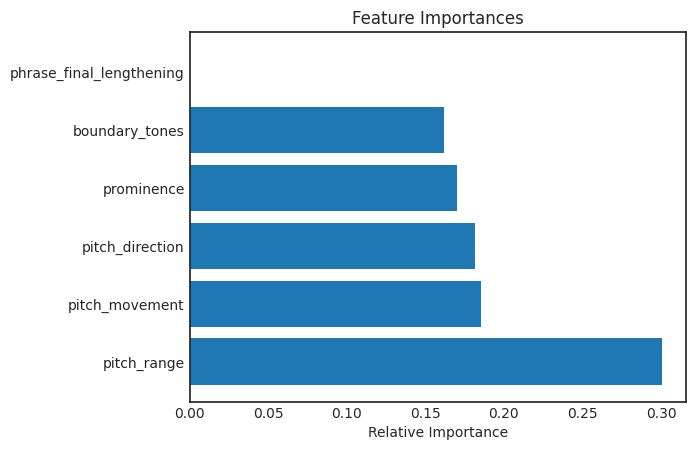

In [59]:
import matplotlib.pyplot as plt

importances = random_search.best_estimator_.feature_importances_
# Train a Random Forest classifier with the best hyperparameters
rfc = RandomForestClassifier(**best_params, random_state=42)
rfc.fit(X_train, y_train)

# Get feature importances
importances = rfc.feature_importances_

# Sort indices in descending order of importance
indices = np.argsort(importances)[::-1]

# Create horizontal bar plot
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [list(features.keys())[i] for i in indices])
plt.xlabel('Relative Importance')
plt.title('Feature Importances')
plt.show()


The output shows the performance of the trained Random Forest Classifier. The accuracy of the model on the test set is 61.11%, meaning that the model correctly predicted the class of 61.11% of the examples in the test set.

The next three sections show the results of cross-validation on the data. The first section shows the cross-validation scores obtained using the default Random Forest Classifier. The mean cross-validation score is 37.55%, indicating that the classifier performs poorly on the data.

The second section shows the cross-validation scores obtained using bagging, which is an ensemble method that involves training multiple classifiers on bootstrap samples of the data and averaging their predictions. The mean bagging cross-validation score is 37.09%, which is slightly lower than the score obtained with the default classifier.

The third section shows the cross-validation scores obtained using Adaboost, which is an ensemble method that iteratively trains new classifiers that focus on the misclassified examples from the previous iterations. The mean Adaboost cross-validation score is 36.59%, which is slightly lower than the scores obtained with the other methods.

Overall, the results indicate that the performance of the Random Forest Classifier on the data is not very good, and that ensembling methods such as bagging and Adaboost do not provide much improvement.

**What to improve**

Hyperparameter tuning: The performance of a random forest model can be sensitive to the choice of hyperparameters, such as the number of trees, the maximum depth of the trees, or the number of features considered at each split. You can use techniques such as grid search or random search to find the optimal hyperparameters for your model.

Data augmentation: If you have a limited amount of data, you can try to generate new data by applying various transformations to your existing data, such as pitch shifting, time stretching, or adding noise. This can help to increase the diversity of your dataset and improve the robustness of your model.

Ensemble learning: You can combine multiple random forest models to improve the overall performance of your classifier. For example, you can use bagging to train multiple random forests on different subsets of the data, or you can use boosting to iteratively train new models that focus on the misclassified examples.

Preprocess the data: e.g., normalize the volume levels

**What to try**

- split dataset to Male and Female
- split dataset to binar(Joy-Sad, Happy-Disgust etc)

# Pitch level features

General

Average pitch level: The mean of the fundamental frequency (pitch) values across the audio recording.

Pitch variability: The standard deviation of the fundamental frequency values across the audio recording.

Pitch contour shape: The mean of the first differences of the fundamental frequency values across the audio recording, which represents the slope of the pitch contour.

Pitch range: The difference between the maximum and minimum fundamental frequency values across the audio recording.

In [60]:
#55
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from pydub import AudioSegment
import numpy as np
import parselmouth

# Extract features from audio files using Praat
def extract_features(audio_path):
    sound = parselmouth.Sound(audio_path)
    pitch = sound.to_pitch()
    pitch_values = pitch.selected_array['frequency']
    return {
        'avarage_pl': np.mean(pitch_values),
        'variability_pl': np.std(pitch_values),
        'countour_ps': np.mean(np.diff(pitch_values)),
        'pitch_range': np.max(pitch_values) - np.min(pitch_values),
    }


# Load the data from the DataFrame
df_pl = df

# Extract the features from the audio recordings
X = []
for path in df_pl['path']:
    features = extract_features(path)
    # Add the features to the feature list
    X.append([features[feature] for feature in features])

# Create the target variable
y = df_pl['labels']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

# Define the hyperparameter space
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500, 600],
    'max_depth': [5, 10, 20, None],
    'max_features': ['sqrt'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the randomized search object
rfc = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(estimator=rfc,
                                   param_distributions=param_dist,
                                   n_iter=20,
                                   cv=5,
                                   n_jobs=-1,
                                   verbose=2)

# Fit the model to the training data
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

#Train a final model on the entire training set using the best hyperparameters
rfc = RandomForestClassifier(random_state=42, **best_params)
rfc.fit(X_train, y_train)

#Make predictions on the testing data
y_pred = rfc.predict(X_test)

#Make predictions on the entire dataset
y_pred_all = rfc.predict(X)

#Add predicted labels to the DataFrame
df_pl['predicted_labels'] = y_pred_all

#Evaluate the accuracy of the model
accuracy = accuracy_score(df_pl['labels'], df_pl['predicted_labels'])
print("Accuracy: {:.2f}%".format(accuracy*100))

joblib.dump(rfc, 'trained_model_pl.pkl')
df_pl.to_csv("/kaggle/working/df_pl_predicted.csv", index = False)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Accuracy: 38.78%
Accuracy: 52.00%


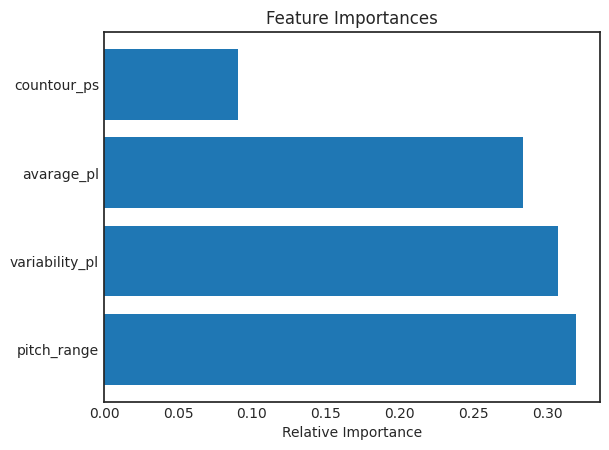

In [61]:
import matplotlib.pyplot as plt

importances = random_search.best_estimator_.feature_importances_
# Train a Random Forest classifier with the best hyperparameters
rfc = RandomForestClassifier(**best_params, random_state=42)
rfc.fit(X_train, y_train)

# Get feature importances
importances = rfc.feature_importances_

# Sort indices in descending order of importance
indices = np.argsort(importances)[::-1]

# Create horizontal bar plot
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [list(features.keys())[i] for i in indices])
plt.xlabel('Relative Importance')
plt.title('Feature Importances')
plt.show()


# Both approaches 


In [62]:
#68
import pandas as pd
from pydub import AudioSegment
import parselmouth
import numpy as np
import parselmouth
from sklearn.metrics import accuracy_score  # add import statement for accuracy_score

import pandas as pd
import numpy as np
import parselmouth
from pydub import AudioSegment
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV


df_ba_rf = df

# Define the feature extraction function
def extract_features(audio_file):
    # Load the audio file
    sound = AudioSegment.from_file(audio_file)
    # Convert to mono and resample to 44.1 kHz
    sound = sound.set_channels(1).set_frame_rate(44100)
    # Convert to numpy array
    signal = np.array(sound.get_array_of_samples())
    # Compute pitch features using Praat
    pitch = parselmouth.Sound(signal, sampling_frequency=sound.frame_rate).to_pitch()
    pitch_values = pitch.selected_array['frequency']
    pitch_movement = np.sum(np.abs(np.diff(pitch_values)))
    pitch_range = np.max(pitch_values) - np.min(pitch_values)
    pitch_direction = np.mean(np.sign(np.diff(pitch_values)))
    # Compute prosodic features using Praat
    intensity = parselmouth.Sound(signal, sampling_frequency=sound.frame_rate).to_intensity()
    intensity_values = intensity.values.T[0]
    #boundary_tones = np.mean(np.diff(intensity_values) > 0)
    sound = parselmouth.Sound(audio_file)

    pitch_ = sound.to_pitch()
    pitch_values_ = pitch_.selected_array['frequency']

    # Convert to numpy array
    signal = np.array(sound.values.T)

    # Compute the pitch contour using Praat
    pitch = sound.to_pitch()
    pitch_values = pitch.selected_array['frequency']

    # Compute the boundary tones feature
    try:
        boundary_tones = np.mean(np.diff(pitch_values) > 0)
    except Exception as e:
        boundary_tones = np.nan

    phrase_final_lengthening = np.mean(intensity_values[-int(len(intensity_values)*0.2):]) / np.mean(intensity_values)
    prominence = np.max(intensity_values)
    # Return the features as a dictionary
    return {
        'pitch_movement': pitch_movement,
        'pitch_range': pitch_range,
        'pitch_direction': pitch_direction,
        'boundary_tones': boundary_tones,
        'phrase_final_lengthening': phrase_final_lengthening,
        'prominence': prominence,
        'avarage_pl' : np.mean(pitch_values_),
        'variability_pl' : np.std(pitch_values_),
        'countour_ps' : np.mean(np.diff(pitch_values_)),
        'pitch_range_ic' : np.max(pitch_values_) - np.min(pitch_values_)
        
    }



In [63]:
import pandas as pd
import numpy as np
import parselmouth
from pydub import AudioSegment
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# Extract the features from the audio recordings
X = []
for path in df_ba_rf['path']:
    features = extract_features(path)
    # Add the features to the feature list
    X.append([features[feature] for feature in features])

# Create the target variable
y = df_ba_rf['labels']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

# Define the hyperparameter space
param_dist = {
    'n_estimators': [100, 200, 300,400,500,600,700],
    'max_depth': [5, 10, 20, None],
    'max_features': ['sqrt'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the randomized search object
rfc = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(estimator=rfc,
                                   param_distributions=param_dist,
                                   n_iter=20,
                                   cv=5,
                                   n_jobs=-1,
                                   verbose=2)

# Fit the model to the training data
random_search.fit(X_train, y_train)
grid_search = GridSearchCV(rfc, param_dist, cv=5)
grid_search.fit(X_train, y_train)
# Get the best hyperparameters
best_params = grid_search.best_params_

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=725; total time=  15.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   4.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   4.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   6.8s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   8.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   9.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=  10.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=  10.9s
[CV] END max_depth=20, max_features=sq

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=  24.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   3.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=  22.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=  23.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=600; total time=  10.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   8.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  12.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=  14.9s
[CV] END max_depth=None, max_featu

In [64]:

#Train a final model on the entire training set using the best hyperparameters
rfc = RandomForestClassifier(random_state=42, **best_params)
rfc.fit(X_train, y_train)

#Make predictions on the testing data
y_pred = rfc.predict(X_test)


#Make predictions on the entire dataset
y_pred_all = rfc.predict(X)

#Add predicted labels to the DataFrame
df_ba_rf['predicted_labels'] = y_pred_all

#Evaluate the accuracy of the model
accuracy = accuracy_score(df_ba_rf['labels'], df_ba_rf['predicted_labels'])
print("Accuracy: {:.2f}%".format(accuracy*100))

joblib.dump(rfc, 'trained_model_ba.pkl')
df_ba_rf.to_csv("/kaggle/working/df_ba.csv", index = False)

Accuracy: 45.38%
Accuracy: 62.93%


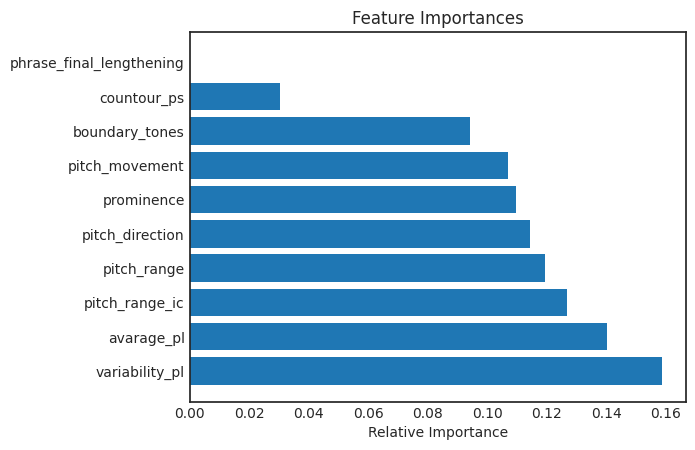

In [65]:
import matplotlib.pyplot as plt

importances = random_search.best_estimator_.feature_importances_
# Train a Random Forest classifier with the best hyperparameters
rfc = RandomForestClassifier(**best_params, random_state=42)
rfc.fit(X_train, y_train)

# Get feature importances
importances = rfc.feature_importances_

# Sort indices in descending order of importance
indices = np.argsort(importances)[::-1]

# Create horizontal bar plot
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [list(features.keys())[i] for i in indices])
plt.xlabel('Relative Importance')
plt.title('Feature Importances')
plt.show()


# Savee

Intonation contour features


In [27]:
import pandas as pd
import numpy as np
import parselmouth
from pydub import AudioSegment
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

def extract_features(audio_file):
    """
    Extracts pitch and prosodic features from an audio file.
    """
    # Load the audio file
    sound = AudioSegment.from_file(audio_file)
    # Convert to mono and resample to 44.1 kHz
    sound = sound.set_channels(1).set_frame_rate(44100)
    # Convert to numpy array
    signal = np.array(sound.get_array_of_samples())
    # Compute pitch features using Praat
    pitch = parselmouth.Sound(signal, sampling_frequency=sound.frame_rate).to_pitch()
    pitch_values = pitch.selected_array['frequency']
    pitch_movement = np.sum(np.abs(np.diff(pitch_values)))
    pitch_range = np.max(pitch_values) - np.min(pitch_values)
    pitch_direction = np.mean(np.sign(np.diff(pitch_values)))
    # Compute prosodic features using Praat
    intensity = parselmouth.Sound(signal, sampling_frequency=sound.frame_rate).to_intensity()
    intensity_values = intensity.values.T[0]
    sound = parselmouth.Sound(audio_file)

    # Convert to numpy array
    signal = np.array(sound.values.T)

    # Compute the pitch contour using Praat
    pitch = sound.to_pitch()
    pitch_values = pitch.selected_array['frequency']

    # Compute the boundary tones feature
    try:
        boundary_tones = np.mean(np.diff(pitch_values) > 0)
    except Exception as e:
        boundary_tones = np.nan

    phrase_final_lengthening = np.mean(intensity_values[-int(len(intensity_values)*0.2):]) / np.mean(intensity_values)
    prominence = np.max(intensity_values)
    # Return the features as a dictionary
    return {
        'pitch_movement': pitch_movement,
        'pitch_range': pitch_range,
        'pitch_direction': pitch_direction,
        'boundary_tones': boundary_tones,
        'phrase_final_lengthening': phrase_final_lengthening,
        'prominence': prominence
    }

# Load the data from the DataFrame
df_cs = savee_rows = df[df['dataset'] == 'SAVEE']

# Extract the features from the audio recordings
X = []
for path in df_cs['path']:
    features = extract_features(path)
    # Add the features to the feature list
    X.append([features[feature] for feature in features])

# Create the target variable
y = df_cs['labels']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
#choosing the best hyperparameters
import pandas as pd
import numpy as np
import parselmouth
from pydub import AudioSegment
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for the number of trees
param_grid = {
    'n_estimators': [200,300,400,500,600],
    'max_depth': [5, 10, 20],
    'max_features': ['sqrt'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the grid search object
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5, # use 5-fold cross-validation
                           scoring='accuracy')

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding accuracy score
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 400}


In [30]:
# Define the hyperparameter space
param_dist = {
    'n_estimators': [400],
    'max_depth': [10],
    'max_features': ['sqrt'],
    'min_samples_split': [2],
    'min_samples_leaf': [4]
}

# Create the randomized search object
rfc = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(estimator=rfc,
                                   param_distributions=param_dist,
                                   n_iter=20,
                                   cv=5,
                                   n_jobs=-1,
                                   verbose=2)

# Fit the model to the training data
random_search.fit(X_train, y_train)

grid_search = GridSearchCV(rfc, param_dist, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", grid_search.best_params_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Best hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 400}


In [31]:
#40,62
#Train a final model on the entire training set using the best hyperparameters
rfc = RandomForestClassifier(random_state=42, **best_params)
rfc.fit(X_train, y_train)

#Make predictions on the testing data
y_pred = rfc.predict(X_test)

#Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

#Make predictions on the entire dataset
y_pred_all = rfc.predict(X)

#Add predicted labels to the DataFrame
df_cs['predicted_labels'] = y_pred_all

#Use cross-validation to evaluate the model's performance
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rfc, X, y, cv=5)
print("Cross-validation scores:", scores)
print("Mean cross-validation score: {:.2f}%".format(np.mean(scores)*100))

#Use ensemble learning to improve the model's performance
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(base_estimator=rfc, n_estimators=100, max_samples=0.8, max_features=0.8)
scores = cross_val_score(bagging, X, y, cv=5)
print("Bagging Cross-validation scores:", scores)
print("Mean Bagging Cross-validation score: {:.2f}%".format(np.mean(scores)*100))

joblib.dump(rfc, 'trained_model_cs_savee.pkl')
df_cs.to_csv("/kaggle/working/df_cs_predicted_savee.csv", index = False)

Accuracy: 39.58%
Cross-validation scores: [0.33333333 0.39583333 0.33333333 0.32291667 0.375     ]
Mean cross-validation score: 35.21%
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   1.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   1.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   1.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   1.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   1.1s
Bagging Cross-validation scores: [0.34375    0.39583333 0.36458333 0.30208333 0.36458333]
Mean Bagging Cross-validation score: 35.42%


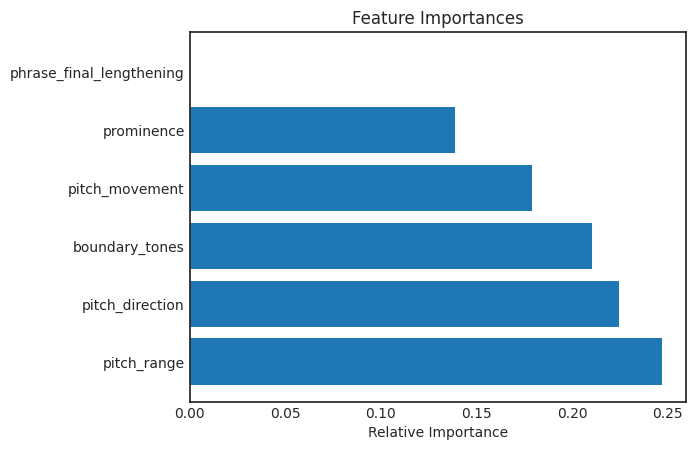

In [32]:
import matplotlib.pyplot as plt

importances = random_search.best_estimator_.feature_importances_
# Train a Random Forest classifier with the best hyperparameters
rfc = RandomForestClassifier(**best_params, random_state=42)
rfc.fit(X_train, y_train)

# Get feature importances
importances = rfc.feature_importances_

# Sort indices in descending order of importance
indices = np.argsort(importances)[::-1]

# Create horizontal bar plot
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [list(features.keys())[i] for i in indices])
plt.xlabel('Relative Importance')
plt.title('Feature Importances')
plt.show()


pitch level savee

In [33]:
#55
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from pydub import AudioSegment
import numpy as np
import parselmouth

# Extract features from audio files using Praat
def extract_features(audio_path):
    sound = parselmouth.Sound(audio_path)
    pitch = sound.to_pitch()
    pitch_values = pitch.selected_array['frequency']
    return {
        'avarage_pl': np.mean(pitch_values),
        'variability_pl': np.std(pitch_values),
        'countour_ps': np.mean(np.diff(pitch_values)),
        'pitch_range': np.max(pitch_values) - np.min(pitch_values),
    }


# Load the data from the DataFrame
df_pl = savee_rows = df[df['dataset'] == 'SAVEE']

# Extract the features from the audio recordings
X = []
for path in df_pl['path']:
    features = extract_features(path)
    # Add the features to the feature list
    X.append([features[feature] for feature in features])

# Create the target variable
y = df_pl['labels']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

# Define the hyperparameter space
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500, 600],
    'max_depth': [5, 10, 20, None],
    'max_features': ['sqrt'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the randomized search object
rfc = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(estimator=rfc,
                                   param_distributions=param_dist,
                                   n_iter=20,
                                   cv=5,
                                   n_jobs=-1,
                                   verbose=2)

# Fit the model to the training data
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

#Train a final model on the entire training set using the best hyperparameters
rfc = RandomForestClassifier(random_state=42, **best_params)
rfc.fit(X_train, y_train)

#Make predictions on the testing data
y_pred = rfc.predict(X_test)

#Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

#Make predictions on the entire dataset
y_pred_all = rfc.predict(X)

#Add predicted labels to the DataFrame
df_pl['predicted_labels'] = y_pred_all

#Use cross-validation to evaluate the model's performance
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rfc, X, y, cv=5)
print("Cross-validation scores:", scores)
print("Mean cross-validation score: {:.2f}%".format(np.mean(scores)*100))

#Use ensemble learning to improve the model's performance
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(base_estimator=rfc, n_estimators=100, max_samples=0.8, max_features=0.8)
scores = cross_val_score(bagging, X, y, cv=5)
print("Bagging Cross-validation scores:", scores)
print("Mean Bagging Cross-validation score: {:.2f}%".format(np.mean(scores)*100))

from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier(base_estimator=rfc, n_estimators=100, learning_rate=0.1)
scores = cross_val_score(adaboost, X, y, cv=5)
print("Adaboost Cross-validation scores:", scores)
print("Mean Adaboost Cross-validation score: {:.2f}%".format(np.mean(scores)*100))
joblib.dump(rfc, 'trained_model_pl_savee_pl.pkl')
df_pl.to_csv("/kaggle/working/df_pl_predicted_savee.csv", index = False)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Accuracy: 37.50%
Cross-validation scores: [0.25       0.4375     0.46875    0.47916667 0.4375    ]
Mean cross-validation score: 41.46%
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   1.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   1.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=   2.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   1.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   1.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   2.2s
[CV] END max_dep

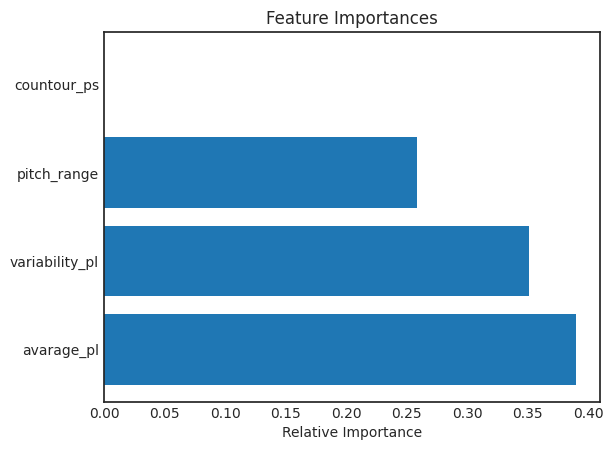

In [34]:
import matplotlib.pyplot as plt

importances = random_search.best_estimator_.feature_importances_
# Train a Random Forest classifier with the best hyperparameters
rfc = RandomForestClassifier(**best_params, random_state=42)
rfc.fit(X_train, y_train)

# Get feature importances
importances = rfc.feature_importances_

# Sort indices in descending order of importance
indices = np.argsort(importances)[::-1]

# Create horizontal bar plot
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [list(features.keys())[i] for i in indices])
plt.xlabel('Relative Importance')
plt.title('Feature Importances')
plt.show()


savee both aproaches

In [35]:
#68
import pandas as pd
from pydub import AudioSegment
import parselmouth
import numpy as np
import parselmouth
from sklearn.metrics import accuracy_score  # add import statement for accuracy_score

import pandas as pd
import numpy as np
import parselmouth
from pydub import AudioSegment
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV


df_ba_rf = savee_rows = df[df['dataset'] == 'SAVEE']

# Define the feature extraction function
def extract_features(audio_file):
    # Load the audio file
    sound = AudioSegment.from_file(audio_file)
    # Convert to mono and resample to 44.1 kHz
    sound = sound.set_channels(1).set_frame_rate(44100)
    # Convert to numpy array
    signal = np.array(sound.get_array_of_samples())
    # Compute pitch features using Praat
    pitch = parselmouth.Sound(signal, sampling_frequency=sound.frame_rate).to_pitch()
    pitch_values = pitch.selected_array['frequency']
    pitch_movement = np.sum(np.abs(np.diff(pitch_values)))
    pitch_range = np.max(pitch_values) - np.min(pitch_values)
    pitch_direction = np.mean(np.sign(np.diff(pitch_values)))
    # Compute prosodic features using Praat
    intensity = parselmouth.Sound(signal, sampling_frequency=sound.frame_rate).to_intensity()
    intensity_values = intensity.values.T[0]
    #boundary_tones = np.mean(np.diff(intensity_values) > 0)
    sound = parselmouth.Sound(audio_file)

    pitch_ = sound.to_pitch()
    pitch_values_ = pitch_.selected_array['frequency']

    # Convert to numpy array
    signal = np.array(sound.values.T)

    # Compute the pitch contour using Praat
    pitch = sound.to_pitch()
    pitch_values = pitch.selected_array['frequency']

    # Compute the boundary tones feature
    try:
        boundary_tones = np.mean(np.diff(pitch_values) > 0)
    except Exception as e:
        boundary_tones = np.nan

    phrase_final_lengthening = np.mean(intensity_values[-int(len(intensity_values)*0.2):]) / np.mean(intensity_values)
    prominence = np.max(intensity_values)
    # Return the features as a dictionary
    return {
        'pitch_movement': pitch_movement,
        'pitch_range': pitch_range,
        'pitch_direction': pitch_direction,
        'boundary_tones': boundary_tones,
        'phrase_final_lengthening': phrase_final_lengthening,
        'prominence': prominence,
        'pitch_values' : np.mean(pitch_values_),
        'pitch_values_std' : np.std(pitch_values_),
        'pv_mean' : np.mean(np.diff(pitch_values_)),
        'pv_max' : np.max(pitch_values_) - np.min(pitch_values_)
        
    }
    return {
        'pitch_movement': pitch_movement,
        'pitch_range': pitch_range,
        'pitch_direction': pitch_direction,
        'boundary_tones': boundary_tones,
        'phrase_final_lengthening': phrase_final_lengthening,
        'prominence': prominence,
        'pitch_values' : np.mean(pitch_values_),
        'pitch_values_std' : np.std(pitch_values_),
        'pv_mean' : np.mean(np.diff(pitch_values_)),
        'pv_max' : np.max(pitch_values_) - np.min(pitch_values_)
        
    }




In [36]:
import pandas as pd
import numpy as np
import parselmouth
from pydub import AudioSegment
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# Extract the features from the audio recordings
X = []
for path in df_ba_rf['path']:
    features = extract_features(path)
    # Add the features to the feature list
    X.append([features[feature] for feature in features])

# Create the target variable
y = df_ba_rf['labels']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

# Define the hyperparameter space
param_dist = {
    'n_estimators': [100, 200, 300,400,500,600,700],
    'max_depth': [5, 10, 20, None],
    'max_features': ['sqrt'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the randomized search object
rfc = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(estimator=rfc,
                                   param_distributions=param_dist,
                                   n_iter=20,
                                   cv=5,
                                   n_jobs=-1,
                                   verbose=2)

# Fit the model to the training data
random_search.fit(X_train, y_train)
grid_search = GridSearchCV(rfc, param_dist, cv=5)
grid_search.fit(X_train, y_train)
# Get the best hyperparameters
best_params = grid_search.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=700; total time=   2.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=700; total time=   2.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   1.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=600; total time=   2.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=600; total time=   2.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   1.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END max_depth=5, max_features=sqrt

In [37]:

#Train a final model on the entire training set using the best hyperparameters
rfc = RandomForestClassifier(random_state=42, **best_params)
rfc.fit(X_train, y_train)

#Make predictions on the testing data
y_pred = rfc.predict(X_test)

#Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

#Make predictions on the entire dataset
y_pred_all = rfc.predict(X)

#Add predicted labels to the DataFrame
df_ba_rf['predicted_labels'] = y_pred_all

#Use cross-validation to evaluate the model's performance
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rfc, X, y, cv=5)
print("Cross-validation scores:", scores)
print("Mean cross-validation score: {:.2f}%".format(np.mean(scores)*100))

#Use ensemble learning to improve the model's performance
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(base_estimator=rfc, n_estimators=100, max_samples=0.8, max_features=0.8)
scores = cross_val_score(bagging, X, y, cv=5)
print("Bagging Cross-validation scores:", scores)
print("Mean Bagging Cross-validation score: {:.2f}%".format(np.mean(scores)*100))

from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier(base_estimator=rfc, n_estimators=100, learning_rate=0.1)
scores = cross_val_score(adaboost, X, y, cv=5)
print("Adaboost Cross-validation scores:", scores)
print("Mean Adaboost Cross-validation score: {:.2f}%".format(np.mean(scores)*100))

joblib.dump(rfc, 'trained_model_ba_savee.pkl')
df_ba_rf.to_csv("/kaggle/working/df_ba_savee.csv", index = False)

Accuracy: 46.88%
Cross-validation scores: [0.4375     0.41666667 0.51041667 0.41666667 0.5       ]
Mean cross-validation score: 45.62%
Bagging Cross-validation scores: [0.41666667 0.41666667 0.53125    0.47916667 0.54166667]
Mean Bagging Cross-validation score: 47.71%
Adaboost Cross-validation scores: [0.4375     0.47916667 0.52083333 0.44791667 0.53125   ]
Mean Adaboost Cross-validation score: 48.33%


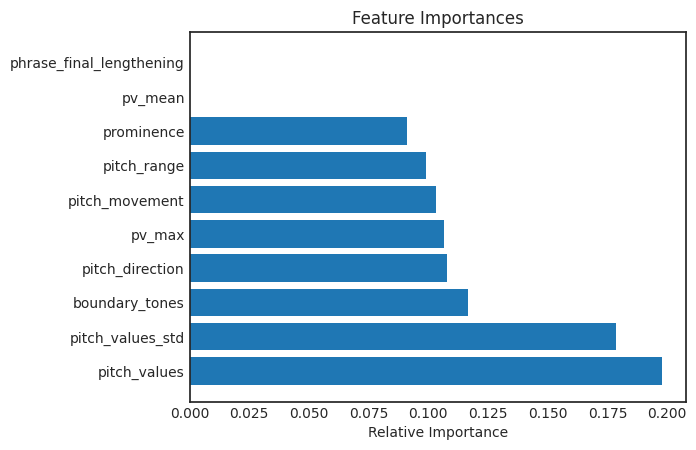

In [38]:
import matplotlib.pyplot as plt

importances = random_search.best_estimator_.feature_importances_
# Train a Random Forest classifier with the best hyperparameters
rfc = RandomForestClassifier(**best_params, random_state=42)
rfc.fit(X_train, y_train)

# Get feature importances
importances = rfc.feature_importances_

# Sort indices in descending order of importance
indices = np.argsort(importances)[::-1]

# Create horizontal bar plot
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [list(features.keys())[i] for i in indices])
plt.xlabel('Relative Importance')
plt.title('Feature Importances')
plt.show()


# Ravdess

Intonation contour approach ravdess

In [40]:
import pandas as pd
import numpy as np
import parselmouth
from pydub import AudioSegment
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

def extract_features(audio_file):
    """
    Extracts pitch and prosodic features from an audio file.
    """
    # Load the audio file
    sound = AudioSegment.from_file(audio_file)
    # Convert to mono and resample to 44.1 kHz
    sound = sound.set_channels(1).set_frame_rate(44100)
    # Convert to numpy array
    signal = np.array(sound.get_array_of_samples())
    # Compute pitch features using Praat
    pitch = parselmouth.Sound(signal, sampling_frequency=sound.frame_rate).to_pitch()
    pitch_values = pitch.selected_array['frequency']
    pitch_movement = np.sum(np.abs(np.diff(pitch_values)))
    pitch_range = np.max(pitch_values) - np.min(pitch_values)
    pitch_direction = np.mean(np.sign(np.diff(pitch_values)))
    # Compute prosodic features using Praat
    intensity = parselmouth.Sound(signal, sampling_frequency=sound.frame_rate).to_intensity()
    intensity_values = intensity.values.T[0]
    sound = parselmouth.Sound(audio_file)

    # Convert to numpy array
    signal = np.array(sound.values.T)

    # Compute the pitch contour using Praat
    pitch = sound.to_pitch()
    pitch_values = pitch.selected_array['frequency']

    # Compute the boundary tones feature
    try:
        boundary_tones = np.mean(np.diff(pitch_values) > 0)
    except Exception as e:
        boundary_tones = np.nan

    phrase_final_lengthening = np.mean(intensity_values[-int(len(intensity_values)*0.2):]) / np.mean(intensity_values)
    prominence = np.max(intensity_values)
    # Return the features as a dictionary
    return {
        'pitch_movement': pitch_movement,
        'pitch_range': pitch_range,
        'pitch_direction': pitch_direction,
        'boundary_tones': boundary_tones,
        'phrase_final_lengthening': phrase_final_lengthening,
        'prominence': prominence
    }

# Load the data from the DataFrame
df_cs = savee_rows = df[df['dataset'] == 'RAVDESS']

# Extract the features from the audio recordings
X = []
for path in df_cs['path']:
    features = extract_features(path)
    # Add the features to the feature list
    X.append([features[feature] for feature in features])

# Create the target variable
y = df_cs['labels']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
#choosing the best hyperparameters
import pandas as pd
import numpy as np
import parselmouth
from pydub import AudioSegment
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for the number of trees
param_grid = {
    'n_estimators': [200,300,400,500,600],
    'max_depth': [5, 10, 20],
    'max_features': ['sqrt'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the grid search object
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5, # use 5-fold cross-validation
                           scoring='accuracy')

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding accuracy score
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [42]:
# Define the hyperparameter space
param_dist = {
    'n_estimators': [200,300,400,500,600],
    'max_depth': [5, 10, 20],
    'max_features': ['sqrt'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the randomized search object
rfc = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(estimator=rfc,
                                   param_distributions=param_dist,
                                   n_iter=20,
                                   cv=5,
                                   n_jobs=-1,
                                   verbose=2)

# Fit the model to the training data
random_search.fit(X_train, y_train)

grid_search = GridSearchCV(rfc, param_dist, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", grid_search.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   1.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   1.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   1.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   2.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   1.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   1.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   2.0s
[CV] END max_depth=5, max_features=sqrt, m

In [43]:
#40,62
#Train a final model on the entire training set using the best hyperparameters
rfc = RandomForestClassifier(random_state=42, **best_params)
rfc.fit(X_train, y_train)

#Make predictions on the testing data
y_pred = rfc.predict(X_test)

#Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

#Make predictions on the entire dataset
y_pred_all = rfc.predict(X)

#Add predicted labels to the DataFrame
df_cs['predicted_labels'] = y_pred_all

#Use cross-validation to evaluate the model's performance
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rfc, X, y, cv=5)
print("Cross-validation scores:", scores)
print("Mean cross-validation score: {:.2f}%".format(np.mean(scores)*100))

#Use ensemble learning to improve the model's performance
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(base_estimator=rfc, n_estimators=100, max_samples=0.8, max_features=0.8)
scores = cross_val_score(bagging, X, y, cv=5)
print("Bagging Cross-validation scores:", scores)
print("Mean Bagging Cross-validation score: {:.2f}%".format(np.mean(scores)*100))

from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier(base_estimator=rfc, n_estimators=100, learning_rate=0.1)
scores = cross_val_score(adaboost, X, y, cv=5)
print("Adaboost Cross-validation scores:", scores)
print("Mean Adaboost Cross-validation score: {:.2f}%".format(np.mean(scores)*100))

joblib.dump(rfc, 'trained_model_cs_ravdess.pkl')
df_cs.to_csv("/kaggle/working/df_cs_predicted_ravdess.csv", index = False)

Accuracy: 35.42%
Cross-validation scores: [0.30555556 0.25694444 0.32638889 0.25694444 0.3125    ]
Mean cross-validation score: 29.17%
Bagging Cross-validation scores: [0.3125     0.25694444 0.30555556 0.27083333 0.33333333]
Mean Bagging Cross-validation score: 29.58%
Adaboost Cross-validation scores: [0.34722222 0.22222222 0.29166667 0.27777778 0.31944444]
Mean Adaboost Cross-validation score: 29.17%


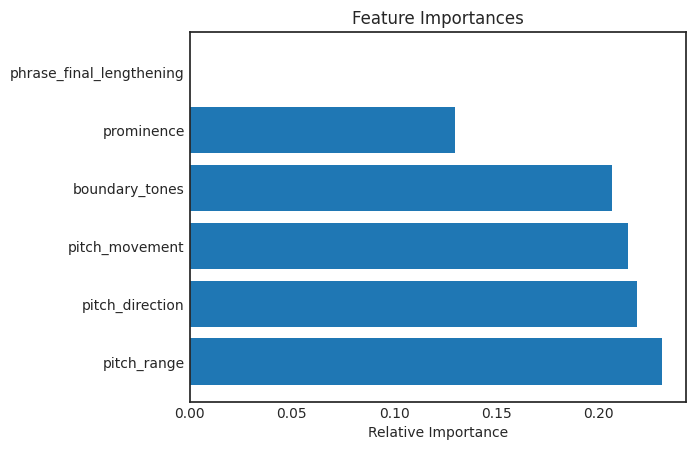

In [44]:
import matplotlib.pyplot as plt

importances = random_search.best_estimator_.feature_importances_
# Train a Random Forest classifier with the best hyperparameters
rfc = RandomForestClassifier(**best_params, random_state=42)
rfc.fit(X_train, y_train)

# Get feature importances
importances = rfc.feature_importances_

# Sort indices in descending order of importance
indices = np.argsort(importances)[::-1]

# Create horizontal bar plot
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [list(features.keys())[i] for i in indices])
plt.xlabel('Relative Importance')
plt.title('Feature Importances')
plt.show()


Pitch level approach ravdess

In [45]:
#55
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from pydub import AudioSegment
import numpy as np
import parselmouth

# Extract features from audio files using Praat
def extract_features(audio_path):
    sound = parselmouth.Sound(audio_path)
    pitch = sound.to_pitch()
    pitch_values = pitch.selected_array['frequency']
    return {
        'avarage_pl': np.mean(pitch_values),
        'variability_pl': np.std(pitch_values),
        'countour_ps': np.mean(np.diff(pitch_values)),
        'pitch_range': np.max(pitch_values) - np.min(pitch_values),
    }


# Load the data from the DataFrame
df_pl = savee_rows = df[df['dataset'] == 'RAVDESS']

# Extract the features from the audio recordings
X = []
for path in df_pl['path']:
    features = extract_features(path)
    # Add the features to the feature list
    X.append([features[feature] for feature in features])

# Create the target variable
y = df_pl['labels']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

# Define the hyperparameter space
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500, 600],
    'max_depth': [5, 10, 20, None],
    'max_features': ['sqrt'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the randomized search object
rfc = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(estimator=rfc,
                                   param_distributions=param_dist,
                                   n_iter=20,
                                   cv=5,
                                   n_jobs=-1,
                                   verbose=2)

# Fit the model to the training data
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

#Train a final model on the entire training set using the best hyperparameters
rfc = RandomForestClassifier(random_state=42, **best_params)
rfc.fit(X_train, y_train)

#Make predictions on the testing data
y_pred = rfc.predict(X_test)

#Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

#Make predictions on the entire dataset
y_pred_all = rfc.predict(X)

#Add predicted labels to the DataFrame
df_pl['predicted_labels'] = y_pred_all

#Use cross-validation to evaluate the model's performance
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rfc, X, y, cv=5)
print("Cross-validation scores:", scores)
print("Mean cross-validation score: {:.2f}%".format(np.mean(scores)*100))

#Use ensemble learning to improve the model's performance
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(base_estimator=rfc, n_estimators=100, max_samples=0.8, max_features=0.8)
scores = cross_val_score(bagging, X, y, cv=5)
print("Bagging Cross-validation scores:", scores)
print("Mean Bagging Cross-validation score: {:.2f}%".format(np.mean(scores)*100))

from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier(base_estimator=rfc, n_estimators=100, learning_rate=0.1)
scores = cross_val_score(adaboost, X, y, cv=5)
print("Adaboost Cross-validation scores:", scores)
print("Mean Adaboost Cross-validation score: {:.2f}%".format(np.mean(scores)*100))
joblib.dump(rfc, 'trained_model_pl_ravdess.pkl')
df_pl.to_csv("/kaggle/working/df_pl_predicted_ravdess.csv", index = False)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Accuracy: 28.47%
Cross-validation scores: [0.32638889 0.27083333 0.28472222 0.23611111 0.29166667]
Mean cross-validation score: 28.19%
Bagging Cross-validation scores: [0.34722222 0.27777778 0.27083333 0.22222222 0.32638889]
Mean Bagging Cross-validation score: 28.89%
Adaboost Cross-validation scores: [0.33333333 0.24305556 0.27083333 0.23611111 0.30555556]
Mean Adaboost Cross-validation score: 27.78%


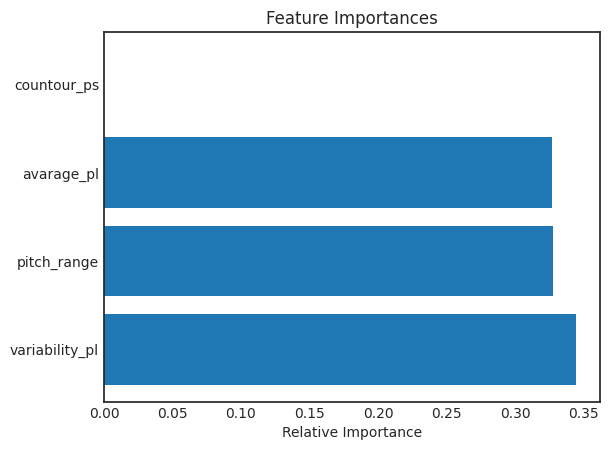

In [46]:
import matplotlib.pyplot as plt

importances = random_search.best_estimator_.feature_importances_
# Train a Random Forest classifier with the best hyperparameters
rfc = RandomForestClassifier(**best_params, random_state=42)
rfc.fit(X_train, y_train)

# Get feature importances
importances = rfc.feature_importances_

# Sort indices in descending order of importance
indices = np.argsort(importances)[::-1]

# Create horizontal bar plot
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [list(features.keys())[i] for i in indices])
plt.xlabel('Relative Importance')
plt.title('Feature Importances')
plt.show()


BOth approaches

In [47]:
#68
import pandas as pd
from pydub import AudioSegment
import parselmouth
import numpy as np
import parselmouth
from sklearn.metrics import accuracy_score  # add import statement for accuracy_score

import pandas as pd
import numpy as np
import parselmouth
from pydub import AudioSegment
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV


df_ba_rf = savee_rows = df[df['dataset'] == 'RAVDESS']

# Define the feature extraction function
def extract_features(audio_file):
    # Load the audio file
    sound = AudioSegment.from_file(audio_file)
    # Convert to mono and resample to 44.1 kHz
    sound = sound.set_channels(1).set_frame_rate(44100)
    # Convert to numpy array
    signal = np.array(sound.get_array_of_samples())
    # Compute pitch features using Praat
    pitch = parselmouth.Sound(signal, sampling_frequency=sound.frame_rate).to_pitch()
    pitch_values = pitch.selected_array['frequency']
    pitch_movement = np.sum(np.abs(np.diff(pitch_values)))
    pitch_range = np.max(pitch_values) - np.min(pitch_values)
    pitch_direction = np.mean(np.sign(np.diff(pitch_values)))
    # Compute prosodic features using Praat
    intensity = parselmouth.Sound(signal, sampling_frequency=sound.frame_rate).to_intensity()
    intensity_values = intensity.values.T[0]
    #boundary_tones = np.mean(np.diff(intensity_values) > 0)
    sound = parselmouth.Sound(audio_file)

    pitch_ = sound.to_pitch()
    pitch_values_ = pitch_.selected_array['frequency']

    # Convert to numpy array
    signal = np.array(sound.values.T)

    # Compute the pitch contour using Praat
    pitch = sound.to_pitch()
    pitch_values = pitch.selected_array['frequency']

    # Compute the boundary tones feature
    try:
        boundary_tones = np.mean(np.diff(pitch_values) > 0)
    except Exception as e:
        boundary_tones = np.nan

    phrase_final_lengthening = np.mean(intensity_values[-int(len(intensity_values)*0.2):]) / np.mean(intensity_values)
    prominence = np.max(intensity_values)
    # Return the features as a dictionary
    return {
        'pitch_movement': pitch_movement,
        'pitch_range': pitch_range,
        'pitch_direction': pitch_direction,
        'boundary_tones': boundary_tones,
        'phrase_final_lengthening': phrase_final_lengthening,
        'prominence': prominence,
        'pitch_values' : np.mean(pitch_values_),
        'pitch_values_std' : np.std(pitch_values_),
        'pv_mean' : np.mean(np.diff(pitch_values_)),
        'pv_max' : np.max(pitch_values_) - np.min(pitch_values_)
        
    }

import pandas as pd
import numpy as np
import parselmouth
from pydub import AudioSegment
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# Extract the features from the audio recordings
X = []
for path in df_ba_rf['path']:
    features = extract_features(path)
    # Add the features to the feature list
    X.append([features[feature] for feature in features])

# Create the target variable
y = df_ba_rf['labels']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

# Define the hyperparameter space
param_dist = {
    'n_estimators': [100, 200, 300,400,500,600,700],
    'max_depth': [5, 10, 20, None],
    'max_features': ['sqrt'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the randomized search object
rfc = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(estimator=rfc,
                                   param_distributions=param_dist,
                                   n_iter=20,
                                   cv=5,
                                   n_jobs=-1,
                                   verbose=2)

# Fit the model to the training data
random_search.fit(X_train, y_train)
grid_search = GridSearchCV(rfc, param_dist, cv=5)
grid_search.fit(X_train, y_train)
# Get the best hyperparameters
best_params = grid_search.best_params_


#Train a final model on the entire training set using the best hyperparameters
rfc = RandomForestClassifier(random_state=42, **best_params)
rfc.fit(X_train, y_train)

#Make predictions on the testing data
y_pred = rfc.predict(X_test)

#Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

#Make predictions on the entire dataset
y_pred_all = rfc.predict(X)

#Add predicted labels to the DataFrame
df_ba_rf['predicted_labels'] = y_pred_all

#Use cross-validation to evaluate the model's performance
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rfc, X, y, cv=5)
print("Cross-validation scores:", scores)
print("Mean cross-validation score: {:.2f}%".format(np.mean(scores)*100))

#Use ensemble learning to improve the model's performance
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(base_estimator=rfc, n_estimators=100, max_samples=0.8, max_features=0.8)
scores = cross_val_score(bagging, X, y, cv=5)
print("Bagging Cross-validation scores:", scores)
print("Mean Bagging Cross-validation score: {:.2f}%".format(np.mean(scores)*100))

from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier(base_estimator=rfc, n_estimators=100, learning_rate=0.1)
scores = cross_val_score(adaboost, X, y, cv=5)
print("Adaboost Cross-validation scores:", scores)
print("Mean Adaboost Cross-validation score: {:.2f}%".format(np.mean(scores)*100))

joblib.dump(rfc, 'trained_model_ba_ravdess.pkl')
df_ba_rf.to_csv("/kaggle/working/df_ba_ravdess.csv", index = False)

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   1.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   1.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   1.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   2.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.8s
[CV] END max_depth=10, max_fe

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   2.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   2.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   2.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   1.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   1.4s
[CV] END max_depth=20, max_featu

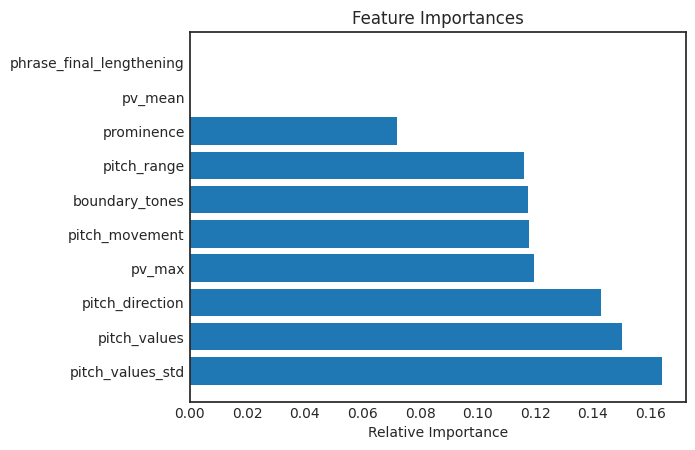

In [48]:
import matplotlib.pyplot as plt

importances = random_search.best_estimator_.feature_importances_
# Train a Random Forest classifier with the best hyperparameters
rfc = RandomForestClassifier(**best_params, random_state=42)
rfc.fit(X_train, y_train)

# Get feature importances
importances = rfc.feature_importances_

# Sort indices in descending order of importance
indices = np.argsort(importances)[::-1]

# Create horizontal bar plot
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [list(features.keys())[i] for i in indices])
plt.xlabel('Relative Importance')
plt.title('Feature Importances')
plt.show()


# Tess

Intonation contour approach TESS

In [27]:
import pandas as pd
import numpy as np
import parselmouth
from pydub import AudioSegment
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

def extract_features(audio_file):
    """
    Extracts pitch and prosodic features from an audio file.
    """
    # Load the audio file
    sound = AudioSegment.from_file(audio_file)
    # Convert to mono and resample to 44.1 kHz
    sound = sound.set_channels(1).set_frame_rate(44100)
    # Convert to numpy array
    signal = np.array(sound.get_array_of_samples())
    # Compute pitch features using Praat
    pitch = parselmouth.Sound(signal, sampling_frequency=sound.frame_rate).to_pitch()
    pitch_values = pitch.selected_array['frequency']
    pitch_movement = np.sum(np.abs(np.diff(pitch_values)))
    pitch_range = np.max(pitch_values) - np.min(pitch_values)
    pitch_direction = np.mean(np.sign(np.diff(pitch_values)))
    # Compute prosodic features using Praat
    intensity = parselmouth.Sound(signal, sampling_frequency=sound.frame_rate).to_intensity()
    intensity_values = intensity.values.T[0]
    sound = parselmouth.Sound(audio_file)

    # Convert to numpy array
    signal = np.array(sound.values.T)

    # Compute the pitch contour using Praat
    pitch = sound.to_pitch()
    pitch_values = pitch.selected_array['frequency']

    # Compute the boundary tones feature
    try:
        boundary_tones = np.mean(np.diff(pitch_values) > 0)
    except Exception as e:
        boundary_tones = np.nan

    phrase_final_lengthening = np.mean(intensity_values[-int(len(intensity_values)*0.2):]) / np.mean(intensity_values)
    prominence = np.max(intensity_values)
    # Return the features as a dictionary
    return {
        'pitch_movement': pitch_movement,
        'pitch_range': pitch_range,
        'pitch_direction': pitch_direction,
        'boundary_tones': boundary_tones,
        'phrase_final_lengthening': phrase_final_lengthening,
        'prominence': prominence
    }

# Load the data from the DataFrame
df_cs = savee_rows = df[df['dataset'] == 'TESS']

# Extract the features from the audio recordings
X = []
for path in df_cs['path']:
    features = extract_features(path)
    # Add the features to the feature list
    X.append([features[feature] for feature in features])

# Create the target variable
y = df_cs['labels']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
#choosing the best hyperparameters
import pandas as pd
import numpy as np
import parselmouth
from pydub import AudioSegment
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for the number of trees
param_grid = {
    'n_estimators': [200,300,400,500,600],
    'max_depth': [5, 10, 20],
    'max_features': ['sqrt'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the grid search object
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5, # use 5-fold cross-validation
                           scoring='accuracy')

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding accuracy score
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [29]:
# Define the hyperparameter space
param_dist = {
    'n_estimators': [200,300,400,500,600],
    'max_depth': [5, 10, 20],
    'max_features': ['sqrt'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the randomized search object
rfc = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(estimator=rfc,
                                   param_distributions=param_dist,
                                   n_iter=20,
                                   cv=5,
                                   n_jobs=-1,
                                   verbose=2)

# Fit the model to the training data
random_search.fit(X_train, y_train)

grid_search = GridSearchCV(rfc, param_dist, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", grid_search.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   2.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   2.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   4.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   2.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   2.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   1.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   4.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   1.7s
[CV] END max_depth=5, max_features=sq

In [30]:
#40,62
#Train a final model on the entire training set using the best hyperparameters
rfc = RandomForestClassifier(random_state=42, **best_params)
rfc.fit(X_train, y_train)

#Make predictions on the testing data
y_pred = rfc.predict(X_test)

#Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

#Make predictions on the entire dataset
y_pred_all = rfc.predict(X)

#Add predicted labels to the DataFrame
df_cs['predicted_labels'] = y_pred_all

#Use cross-validation to evaluate the model's performance
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rfc, X, y, cv=5)
print("Cross-validation scores:", scores)
print("Mean cross-validation score: {:.2f}%".format(np.mean(scores)*100))

#Use ensemble learning to improve the model's performance
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(base_estimator=rfc, n_estimators=100, max_samples=0.8, max_features=0.8)
scores = cross_val_score(bagging, X, y, cv=5)
print("Bagging Cross-validation scores:", scores)
print("Mean Bagging Cross-validation score: {:.2f}%".format(np.mean(scores)*100))

from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier(base_estimator=rfc, n_estimators=100, learning_rate=0.1)
scores = cross_val_score(adaboost, X, y, cv=5)
print("Adaboost Cross-validation scores:", scores)
print("Mean Adaboost Cross-validation score: {:.2f}%".format(np.mean(scores)*100))

joblib.dump(rfc, 'trained_model_cs_tess.pkl')
df_cs.to_csv("/kaggle/working/df_cs_predicted_tess.csv", index = False)

Accuracy: 74.04%
Cross-validation scores: [0.67884615 0.69230769 0.76153846 0.76538462 0.74423077]
Mean cross-validation score: 72.85%
Bagging Cross-validation scores: [0.64423077 0.66730769 0.76538462 0.73653846 0.725     ]
Mean Bagging Cross-validation score: 70.77%
Adaboost Cross-validation scores: [0.66730769 0.70384615 0.77307692 0.75961538 0.76538462]
Mean Adaboost Cross-validation score: 73.38%


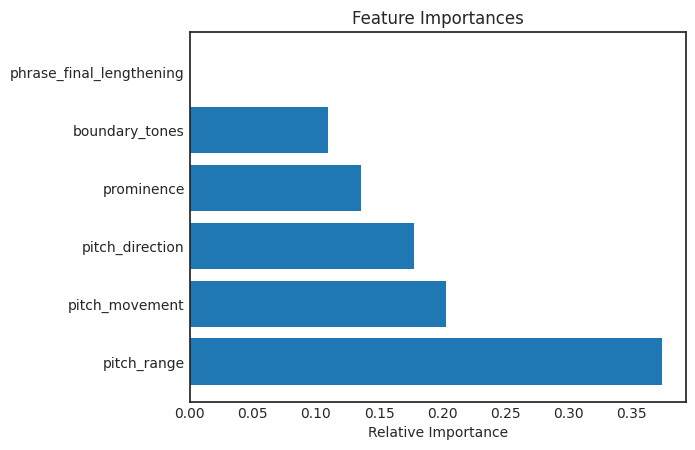

In [31]:
import matplotlib.pyplot as plt

importances = random_search.best_estimator_.feature_importances_
# Train a Random Forest classifier with the best hyperparameters
rfc = RandomForestClassifier(**best_params, random_state=42)
rfc.fit(X_train, y_train)

# Get feature importances
importances = rfc.feature_importances_

# Sort indices in descending order of importance
indices = np.argsort(importances)[::-1]

# Create horizontal bar plot
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [list(features.keys())[i] for i in indices])
plt.xlabel('Relative Importance')
plt.title('Feature Importances')
plt.show()


pitch level approach tess

In [32]:
#55
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from pydub import AudioSegment
import numpy as np
import parselmouth

# Extract features from audio files using Praat
def extract_features(audio_path):
    sound = parselmouth.Sound(audio_path)
    pitch = sound.to_pitch()
    pitch_values = pitch.selected_array['frequency']
    return {
        'avarage_pl': np.mean(pitch_values),
        'variability_pl': np.std(pitch_values),
        'countour_ps': np.mean(np.diff(pitch_values)),
        'pitch_range': np.max(pitch_values) - np.min(pitch_values),
    }


# Load the data from the DataFrame
df_pl = savee_rows = df[df['dataset'] == 'TESS']

# Extract the features from the audio recordings
X = []
for path in df_pl['path']:
    features = extract_features(path)
    # Add the features to the feature list
    X.append([features[feature] for feature in features])

# Create the target variable
y = df_pl['labels']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

# Define the hyperparameter space
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500, 600],
    'max_depth': [5, 10, 20, None],
    'max_features': ['sqrt'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the randomized search object
rfc = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(estimator=rfc,
                                   param_distributions=param_dist,
                                   n_iter=20,
                                   cv=5,
                                   n_jobs=-1,
                                   verbose=2)

# Fit the model to the training data
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

#Train a final model on the entire training set using the best hyperparameters
rfc = RandomForestClassifier(random_state=42, **best_params)
rfc.fit(X_train, y_train)

#Make predictions on the testing data
y_pred = rfc.predict(X_test)

#Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

#Make predictions on the entire dataset
y_pred_all = rfc.predict(X)

#Add predicted labels to the DataFrame
df_pl['predicted_labels'] = y_pred_all

#Use cross-validation to evaluate the model's performance
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rfc, X, y, cv=5)
print("Cross-validation scores:", scores)
print("Mean cross-validation score: {:.2f}%".format(np.mean(scores)*100))

#Use ensemble learning to improve the model's performance
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(base_estimator=rfc, n_estimators=100, max_samples=0.8, max_features=0.8)
scores = cross_val_score(bagging, X, y, cv=5)
print("Bagging Cross-validation scores:", scores)
print("Mean Bagging Cross-validation score: {:.2f}%".format(np.mean(scores)*100))

from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier(base_estimator=rfc, n_estimators=100, learning_rate=0.1)
scores = cross_val_score(adaboost, X, y, cv=5)
print("Adaboost Cross-validation scores:", scores)
print("Mean Adaboost Cross-validation score: {:.2f}%".format(np.mean(scores)*100))
joblib.dump(rfc, 'trained_model_pl_tess.pkl')
df_pl.to_csv("/kaggle/working/df_pl_predicted_tess.csv", index = False)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Accuracy: 80.58%
Cross-validation scores: [0.74230769 0.73846154 0.79807692 0.85192308 0.83269231]
Mean cross-validation score: 79.27%
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   1.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   1.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   1.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   1.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   2.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   3.9s
[CV] END max_depth=20

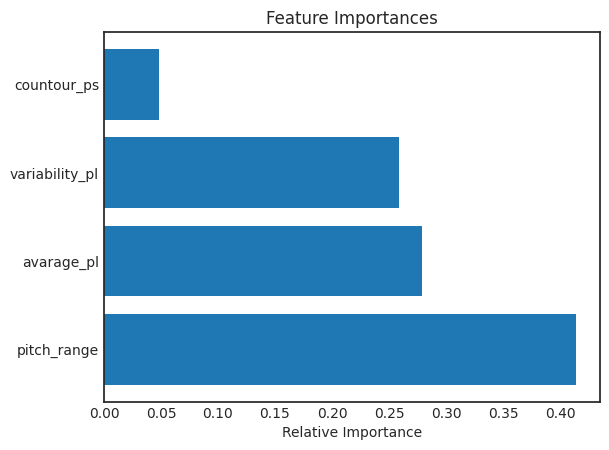

In [33]:
import matplotlib.pyplot as plt

importances = random_search.best_estimator_.feature_importances_
# Train a Random Forest classifier with the best hyperparameters
rfc = RandomForestClassifier(**best_params, random_state=42)
rfc.fit(X_train, y_train)

# Get feature importances
importances = rfc.feature_importances_

# Sort indices in descending order of importance
indices = np.argsort(importances)[::-1]

# Create horizontal bar plot
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [list(features.keys())[i] for i in indices])
plt.xlabel('Relative Importance')
plt.title('Feature Importances')
plt.show()


Both approaches tess

In [34]:
#68
import pandas as pd
from pydub import AudioSegment
import parselmouth
import numpy as np
import parselmouth
from sklearn.metrics import accuracy_score  # add import statement for accuracy_score

import pandas as pd
import numpy as np
import parselmouth
from pydub import AudioSegment
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV


df_ba_rf = savee_rows = df[df['dataset'] == 'TESS']

# Define the feature extraction function
def extract_features(audio_file):
    # Load the audio file
    sound = AudioSegment.from_file(audio_file)
    # Convert to mono and resample to 44.1 kHz
    sound = sound.set_channels(1).set_frame_rate(44100)
    # Convert to numpy array
    signal = np.array(sound.get_array_of_samples())
    # Compute pitch features using Praat
    pitch = parselmouth.Sound(signal, sampling_frequency=sound.frame_rate).to_pitch()
    pitch_values = pitch.selected_array['frequency']
    pitch_movement = np.sum(np.abs(np.diff(pitch_values)))
    pitch_range = np.max(pitch_values) - np.min(pitch_values)
    pitch_direction = np.mean(np.sign(np.diff(pitch_values)))
    # Compute prosodic features using Praat
    intensity = parselmouth.Sound(signal, sampling_frequency=sound.frame_rate).to_intensity()
    intensity_values = intensity.values.T[0]
    #boundary_tones = np.mean(np.diff(intensity_values) > 0)
    sound = parselmouth.Sound(audio_file)

    pitch_ = sound.to_pitch()
    pitch_values_ = pitch_.selected_array['frequency']

    # Convert to numpy array
    signal = np.array(sound.values.T)

    # Compute the pitch contour using Praat
    pitch = sound.to_pitch()
    pitch_values = pitch.selected_array['frequency']

    # Compute the boundary tones feature
    try:
        boundary_tones = np.mean(np.diff(pitch_values) > 0)
    except Exception as e:
        boundary_tones = np.nan

    phrase_final_lengthening = np.mean(intensity_values[-int(len(intensity_values)*0.2):]) / np.mean(intensity_values)
    prominence = np.max(intensity_values)
    # Return the features as a dictionary
    return {
        'pitch_movement': pitch_movement,
        'pitch_range': pitch_range,
        'pitch_direction': pitch_direction,
        'boundary_tones': boundary_tones,
        'phrase_final_lengthening': phrase_final_lengthening,
        'prominence': prominence,
        'pitch_values' : np.mean(pitch_values_),
        'pitch_values_std' : np.std(pitch_values_),
        'pv_mean' : np.mean(np.diff(pitch_values_)),
        'pv_max' : np.max(pitch_values_) - np.min(pitch_values_)
        
    }

import pandas as pd
import numpy as np
import parselmouth
from pydub import AudioSegment
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# Extract the features from the audio recordings
X = []
for path in df_ba_rf['path']:
    features = extract_features(path)
    # Add the features to the feature list
    X.append([features[feature] for feature in features])

# Create the target variable
y = df_ba_rf['labels']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

# Define the hyperparameter space
param_dist = {
    'n_estimators': [100, 200, 300,400,500,600,700],
    'max_depth': [5, 10, 20, None],
    'max_features': ['sqrt'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the randomized search object
rfc = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(estimator=rfc,
                                   param_distributions=param_dist,
                                   n_iter=20,
                                   cv=5,
                                   n_jobs=-1,
                                   verbose=2)

# Fit the model to the training data
random_search.fit(X_train, y_train)
grid_search = GridSearchCV(rfc, param_dist, cv=5)
grid_search.fit(X_train, y_train)
# Get the best hyperparameters
best_params = grid_search.best_params_


#Train a final model on the entire training set using the best hyperparameters
rfc = RandomForestClassifier(random_state=42, **best_params)
rfc.fit(X_train, y_train)

#Make predictions on the testing data
y_pred = rfc.predict(X_test)

#Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

#Make predictions on the entire dataset
y_pred_all = rfc.predict(X)

#Add predicted labels to the DataFrame
df_ba_rf['predicted_labels'] = y_pred_all

#Use cross-validation to evaluate the model's performance
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rfc, X, y, cv=5)
print("Cross-validation scores:", scores)
print("Mean cross-validation score: {:.2f}%".format(np.mean(scores)*100))

#Use ensemble learning to improve the model's performance
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(base_estimator=rfc, n_estimators=100, max_samples=0.8, max_features=0.8)
scores = cross_val_score(bagging, X, y, cv=5)
print("Bagging Cross-validation scores:", scores)
print("Mean Bagging Cross-validation score: {:.2f}%".format(np.mean(scores)*100))

from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier(base_estimator=rfc, n_estimators=100, learning_rate=0.1)
scores = cross_val_score(adaboost, X, y, cv=5)
print("Adaboost Cross-validation scores:", scores)
print("Mean Adaboost Cross-validation score: {:.2f}%".format(np.mean(scores)*100))

joblib.dump(rfc, 'trained_model_ba_tess.pkl')
df_ba_rf.to_csv("/kaggle/working/df_ba_tess.csv", index = False)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   4.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   2.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   2.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   1.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=700; total time=   5.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   5.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   3.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   4.2s
[CV] END max_depth=5, max_fe

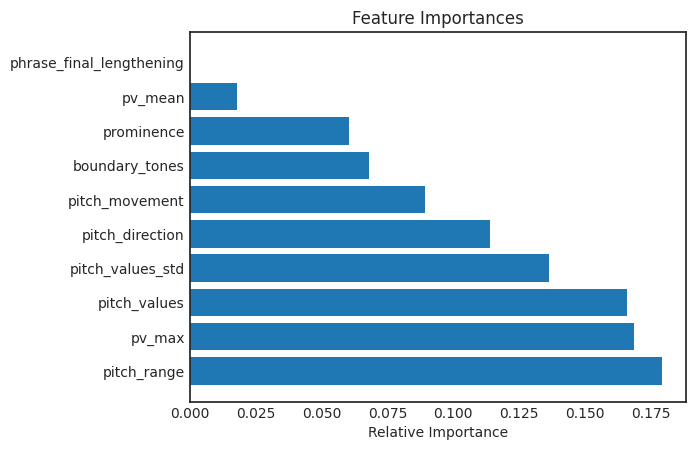

In [35]:
import matplotlib.pyplot as plt

importances = random_search.best_estimator_.feature_importances_
# Train a Random Forest classifier with the best hyperparameters
rfc = RandomForestClassifier(**best_params, random_state=42)
rfc.fit(X_train, y_train)

# Get feature importances
importances = rfc.feature_importances_

# Sort indices in descending order of importance
indices = np.argsort(importances)[::-1]

# Create horizontal bar plot
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [list(features.keys())[i] for i in indices])
plt.xlabel('Relative Importance')
plt.title('Feature Importances')
plt.show()


# Crema

intonation contour crema 

In [48]:
import pandas as pd
import numpy as np
import parselmouth
from pydub import AudioSegment
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
import joblib

def extract_features(audio_file):
    """
    Extracts pitch and prosodic features from an audio file.
    """
    # Load the audio file
    sound = AudioSegment.from_file(audio_file)
    # Convert to mono and resample to 44.1 kHz
    sound = sound.set_channels(1).set_frame_rate(44100)
    # Convert to numpy array
    signal = np.array(sound.get_array_of_samples())
    # Compute pitch features using Praat
    pitch = parselmouth.Sound(signal, sampling_frequency=sound.frame_rate).to_pitch()
    pitch_values = pitch.selected_array['frequency']
    pitch_movement = np.sum(np.abs(np.diff(pitch_values)))
    pitch_range = np.max(pitch_values) - np.min(pitch_values)
    pitch_direction = np.mean(np.sign(np.diff(pitch_values)))
    # Compute prosodic features using Praat
    intensity = parselmouth.Sound(signal, sampling_frequency=sound.frame_rate).to_intensity()
    intensity_values = intensity.values.T[0]
    sound = parselmouth.Sound(audio_file)

    # Convert to numpy array
    signal = np.array(sound.values.T)

    # Compute the pitch contour using Praat
    pitch = sound.to_pitch()
    pitch_values = pitch.selected_array['frequency']

    # Compute the boundary tones feature
    try:
        boundary_tones = np.mean(np.diff(pitch_values) > 0)
    except Exception as e:
        boundary_tones = np.nan

    phrase_final_lengthening = np.mean(intensity_values[-int(len(intensity_values)*0.2):]) / np.mean(intensity_values)
    prominence = np.max(intensity_values)
    # Return the features as a dictionary
    return {
        'pitch_movement': pitch_movement,
        'pitch_range': pitch_range,
        'pitch_direction': pitch_direction,
        'boundary_tones': boundary_tones,
        'phrase_final_lengthening': phrase_final_lengthening,
        'prominence': prominence
    }

# Load the data from the DataFrame
df_cs = savee_rows = df[df['dataset'] == 'CREMA']

# Extract the features from the audio recordings
X = []
for path in df_cs['path']:
    features = extract_features(path)
    # Add the features to the feature list
    X.append([features[feature] for feature in features])

# Create the target variable
y = df_cs['labels']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
#choosing the best hyperparameters
import pandas as pd
import numpy as np
import parselmouth
from pydub import AudioSegment
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for the number of trees
param_grid = {
    'n_estimators': [200,300,400,500,600],
    'max_depth': [5, 10, 20],
    'max_features': ['sqrt'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the grid search object
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5, # use 5-fold cross-validation
                           scoring='accuracy')

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding accuracy score
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 400}


In [50]:
# Define the hyperparameter space
param_dist = {
    'n_estimators': [200, 300, 400,500,600, 700, 800],
    'max_depth': [5, 10, 20, 25, 30],
    'max_features': ['sqrt'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the randomized search object
rfc = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(estimator=rfc,
                                   param_distributions=param_dist,
                                   n_iter=20,
                                   cv=5,
                                   n_jobs=-1,
                                   verbose=2)

# Fit the model to the training data
random_search.fit(X_train, y_train)

grid_search = GridSearchCV(rfc, param_dist, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", grid_search.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   3.4s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   3.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   3.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   3.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   2.9s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   6.9s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   4.9s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   5.0s
[CV] END max_depth=25, max_features=s

In [51]:
#40,62
#Train a final model on the entire training set using the best hyperparameters
rfc = RandomForestClassifier(random_state=42, **best_params)
rfc.fit(X_train, y_train)

#Make predictions on the testing data
y_pred = rfc.predict(X_test)

#Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

#Make predictions on the entire dataset
y_pred_all = rfc.predict(X)

#Add predicted labels to the DataFrame
df_cs['predicted_labels'] = y_pred_all

#Use cross-validation to evaluate the model's performance
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rfc, X, y, cv=5)
print("Cross-validation scores:", scores)
print("Mean cross-validation score: {:.2f}%".format(np.mean(scores)*100))

#Use ensemble learning to improve the model's performance
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(base_estimator=rfc, n_estimators=100, max_samples=0.8, max_features=0.8)
scores = cross_val_score(bagging, X, y, cv=5)
print("Bagging Cross-validation scores:", scores)
print("Mean Bagging Cross-validation score: {:.2f}%".format(np.mean(scores)*100))

from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier(base_estimator=rfc, n_estimators=100, learning_rate=0.1)
scores = cross_val_score(adaboost, X, y, cv=5)
print("Adaboost Cross-validation scores:", scores)
print("Mean Adaboost Cross-validation score: {:.2f}%".format(np.mean(scores)*100))

joblib.dump(rfc, 'trained_model_cs_crema.pkl')
df_cs.to_csv("/kaggle/working/df_cs_predicted_crema.csv", index = False)

Accuracy: 32.24%
Cross-validation scores: [0.32034923 0.3304231  0.30712366 0.28830645 0.3172043 ]
Mean cross-validation score: 31.27%
Bagging Cross-validation scores: [0.32505037 0.32437878 0.30913978 0.29637097 0.31317204]
Mean Bagging Cross-validation score: 31.36%
Adaboost Cross-validation scores: [0.32975151 0.32303559 0.31048387 0.30712366 0.33736559]
Mean Adaboost Cross-validation score: 32.16%


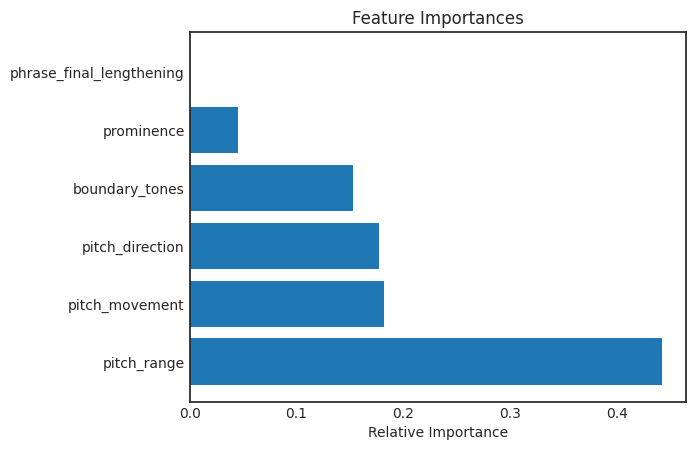

In [52]:
import matplotlib.pyplot as plt

importances = random_search.best_estimator_.feature_importances_
# Train a Random Forest classifier with the best hyperparameters
rfc = RandomForestClassifier(**best_params, random_state=42)
rfc.fit(X_train, y_train)

# Get feature importances
importances = rfc.feature_importances_

# Sort indices in descending order of importance
indices = np.argsort(importances)[::-1]

# Create horizontal bar plot
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [list(features.keys())[i] for i in indices])
plt.xlabel('Relative Importance')
plt.title('Feature Importances')
plt.show()


Pitch level crema

In [53]:
#55
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from pydub import AudioSegment
import numpy as np
import parselmouth

# Extract features from audio files using Praat
def extract_features(audio_path):
    sound = parselmouth.Sound(audio_path)
    pitch = sound.to_pitch()
    pitch_values = pitch.selected_array['frequency']
    return {
        'avarage_pl': np.mean(pitch_values),
        'variability_pl': np.std(pitch_values),
        'countour_ps': np.mean(np.diff(pitch_values)),
        'pitch_range': np.max(pitch_values) - np.min(pitch_values),
    }


# Load the data from the DataFrame
df_pl = savee_rows = df[df['dataset'] == 'CREMA']

# Extract the features from the audio recordings
X = []
for path in df_pl['path']:
    features = extract_features(path)
    # Add the features to the feature list
    X.append([features[feature] for feature in features])

# Create the target variable
y = df_pl['labels']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

# Define the hyperparameter space
param_dist = {
    'n_estimators': [200, 300, 400,500,600, 700, 800],
    'max_depth': [5, 10, 20, 25, 30],
    'max_features': ['sqrt'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the randomized search object
rfc = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(estimator=rfc,
                                   param_distributions=param_dist,
                                   n_iter=20,
                                   cv=5,
                                   n_jobs=-1,
                                   verbose=2)

# Fit the model to the training data
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

#Train a final model on the entire training set using the best hyperparameters
rfc = RandomForestClassifier(random_state=42, **best_params)
rfc.fit(X_train, y_train)

#Make predictions on the testing data
y_pred = rfc.predict(X_test)

#Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

#Make predictions on the entire dataset
y_pred_all = rfc.predict(X)

#Add predicted labels to the DataFrame
df_pl['predicted_labels'] = y_pred_all

#Use cross-validation to evaluate the model's performance
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rfc, X, y, cv=5)
print("Cross-validation scores:", scores)
print("Mean cross-validation score: {:.2f}%".format(np.mean(scores)*100))

#Use ensemble learning to improve the model's performance
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(base_estimator=rfc, n_estimators=100, max_samples=0.8, max_features=0.8)
scores = cross_val_score(bagging, X, y, cv=5)
print("Bagging Cross-validation scores:", scores)
print("Mean Bagging Cross-validation score: {:.2f}%".format(np.mean(scores)*100))

from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier(base_estimator=rfc, n_estimators=100, learning_rate=0.1)
scores = cross_val_score(adaboost, X, y, cv=5)
print("Adaboost Cross-validation scores:", scores)
print("Mean Adaboost Cross-validation score: {:.2f}%".format(np.mean(scores)*100))
joblib.dump(rfc, 'trained_model_pl_crema.pkl')
df_pl.to_csv("/kaggle/working/df_pl_predicted_crema.csv", index = False)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Accuracy: 31.50%
Cross-validation scores: [0.29482874 0.28878442 0.29771505 0.26478495 0.27217742]
Mean cross-validation score: 28.37%
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=  13.4s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=  13.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   3.9s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=  12.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   2.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   5.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   5.1s
[CV] END max_depth=5, max_f

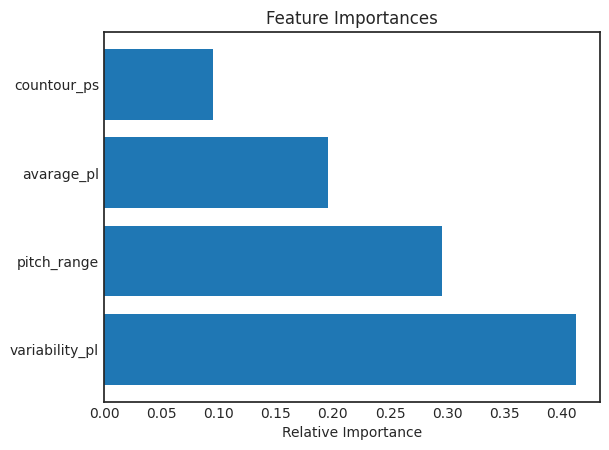

In [54]:
import matplotlib.pyplot as plt

importances = random_search.best_estimator_.feature_importances_
# Train a Random Forest classifier with the best hyperparameters
rfc = RandomForestClassifier(**best_params, random_state=42)
rfc.fit(X_train, y_train)

# Get feature importances
importances = rfc.feature_importances_

# Sort indices in descending order of importance
indices = np.argsort(importances)[::-1]

# Create horizontal bar plot
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [list(features.keys())[i] for i in indices])
plt.xlabel('Relative Importance')
plt.title('Feature Importances')
plt.show()


Both approaches crema

In [27]:
#68
import pandas as pd
from pydub import AudioSegment
import parselmouth
import numpy as np
import parselmouth
from sklearn.metrics import accuracy_score  # add import statement for accuracy_score

import pandas as pd
import numpy as np
import parselmouth
from pydub import AudioSegment
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV


df_ba_rf = savee_rows = df[df['dataset'] == 'CREMA']

# Define the feature extraction function
def extract_features(audio_file):
    # Load the audio file
    sound = AudioSegment.from_file(audio_file)
    # Convert to mono and resample to 44.1 kHz
    sound = sound.set_channels(1).set_frame_rate(44100)
    # Convert to numpy array
    signal = np.array(sound.get_array_of_samples())
    # Compute pitch features using Praat
    pitch = parselmouth.Sound(signal, sampling_frequency=sound.frame_rate).to_pitch()
    pitch_values = pitch.selected_array['frequency']
    pitch_movement = np.sum(np.abs(np.diff(pitch_values)))
    pitch_range = np.max(pitch_values) - np.min(pitch_values)
    pitch_direction = np.mean(np.sign(np.diff(pitch_values)))
    # Compute prosodic features using Praat
    intensity = parselmouth.Sound(signal, sampling_frequency=sound.frame_rate).to_intensity()
    intensity_values = intensity.values.T[0]
    #boundary_tones = np.mean(np.diff(intensity_values) > 0)
    sound = parselmouth.Sound(audio_file)

    pitch_ = sound.to_pitch()
    pitch_values_ = pitch_.selected_array['frequency']

    # Convert to numpy array
    signal = np.array(sound.values.T)

    # Compute the pitch contour using Praat
    pitch = sound.to_pitch()
    pitch_values = pitch.selected_array['frequency']

    # Compute the boundary tones feature
    try:
        boundary_tones = np.mean(np.diff(pitch_values) > 0)
    except Exception as e:
        boundary_tones = np.nan

    phrase_final_lengthening = np.mean(intensity_values[-int(len(intensity_values)*0.2):]) / np.mean(intensity_values)
    prominence = np.max(intensity_values)
    # Return the features as a dictionary
    return {
        'pitch_movement': pitch_movement,
        'pitch_range': pitch_range,
        'pitch_direction': pitch_direction,
        'boundary_tones': boundary_tones,
        'phrase_final_lengthening': phrase_final_lengthening,
        'prominence': prominence,
        'pitch_values' : np.mean(pitch_values_),
        'pitch_values_std' : np.std(pitch_values_),
        'pv_mean' : np.mean(np.diff(pitch_values_)),
        'pv_max' : np.max(pitch_values_) - np.min(pitch_values_)
        
    }


import pandas as pd
import numpy as np
import parselmouth
from pydub import AudioSegment
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# Extract the features from the audio recordings
X = []
for path in df_ba_rf['path']:
    features = extract_features(path)
    # Add the features to the feature list
    X.append([features[feature] for feature in features])

# Create the target variable
y = df_ba_rf['labels']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

# Define the hyperparameter space
param_dist = {
    'n_estimators': [200, 300, 400,500,600, 700, 800],
    'max_depth': [5, 10, 20, 25, 30],
    'max_features': ['sqrt'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the randomized search object
rfc = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(estimator=rfc,
                                   param_distributions=param_dist,
                                   n_iter=20,
                                   cv=5,
                                   n_jobs=-1,
                                   verbose=2)

# Fit the model to the training data
random_search.fit(X_train, y_train)
grid_search = GridSearchCV(rfc, param_dist, cv=5)
grid_search.fit(X_train, y_train)
# Get the best hyperparameters
best_params = grid_search.best_params_


#Train a final model on the entire training set using the best hyperparameters
rfc = RandomForestClassifier(random_state=42, **best_params)
rfc.fit(X_train, y_train)

#Make predictions on the testing data
y_pred = rfc.predict(X_test)

#Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

#Make predictions on the entire dataset
y_pred_all = rfc.predict(X)

#Add predicted labels to the DataFrame
df_ba_rf['predicted_labels'] = y_pred_all

joblib.dump(rfc, 'trained_model_ba_crema.pkl')
df_ba_rf.to_csv("/kaggle/working/df_ba_crema.csv", index = False)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=700; total time=  16.2s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   9.3s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=  10.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   5.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=  20.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=700; total time=  15.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=700; total time=  14.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800; total time=  15.3s
[CV] END max_depth=10, max_features=sq

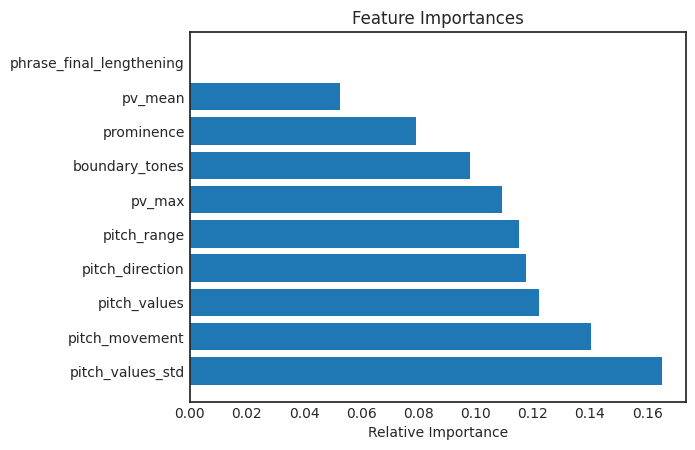

In [28]:
import matplotlib.pyplot as plt

importances = random_search.best_estimator_.feature_importances_
# Train a Random Forest classifier with the best hyperparameters
rfc = RandomForestClassifier(**best_params, random_state=42)
rfc.fit(X_train, y_train)

# Get feature importances
importances = rfc.feature_importances_

# Sort indices in descending order of importance
indices = np.argsort(importances)[::-1]

# Create horizontal bar plot
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [list(features.keys())[i] for i in indices])
plt.xlabel('Relative Importance')
plt.title('Feature Importances')
plt.show()
